## Is the Traffic Collision Fatal?

Competition details:

Business Case : Is the Traffic Collision Fatal?

Data & Industry

In this competition, you will be working on real data from Toronto Police. So, you will have part of (not all) the challenges of dealing with real data which is an invaluable experience and knowledge that will significantly improves your success chance in the area of data science.

Scenario

Toronto police department  would make use of a ML Solution that can give them an idea about the likelihood of fatal collisions that involve loss of life. For the police department it would assist them in taking better measures of security and better planning for road conditions around certain neighborhoods. 

The Task

You need to build a predictive model that based on certain features would provide a classification of either the incident would result in fatality or not.

Datasets

Training data – comprise of 15000 observations and 57 columns.

Testing data : comprise of 3194 rows and 56 columns and no labels.

Evaluation Metrics - Accuracy Score


##### Attribute Information:

INDEX_ : Unique Identifier

ACCNUM : Accident Number

YEAR : Year Collision Occurred

DATE : Date Collision Occurred (time is displayed in UTC format)

TIME : Time Collision Occurred

STREET1 : Street Collision Occurred

STREET2 : Street Collision Occurred

OFFSET : Distance and direction of the Collision

ROAD_CLASS : Road Classification

DISTRICT : City District

WARDNUM : City of Toronto Ward collision occurred

LATITUDE : Latitude

LONGITUDE : Longitude

LOCCOORD : Location Coordinate

ACCLOC : Collision Location

TRAFFCTL : Traffic Control Type

VISIBILITY : Environment Condition

LIGHT : Light Condition

RDSFCOND : Road Surface Condition

ACCLASS : Classification of Accident

IMPACTYPE : Initial Impact Type

INVTYPE : Involvement Type

INVAGE : Age of Involved Party

INJURY : Severity of Injury

FATAL_NO : Sequential Number

INITDIR : Initial Direction of Travel

VEHTYPE : Type of Vehicle

MANOEUVER : Vehicle Manoeuver

DRIVACT : Apparent Driver Action

DRIVCOND : Driver Condition

PEDTYPE : Pedestrian Crash Type - detail

PEDACT : Pedestrian Action

PEDCOND : Condition of Pedestrian

CYCLISTYPE : Cyclist Crash Type - detail

CYCACT : Cyclist Action

CYCCOND : Cyclist Condition

PEDESTRIAN : Pedestrian Involved In Collision

CYCLIST : Cyclists Involved in Collision

AUTOMOBILE : Driver Involved in Collision

MOTORCYCLE : Motorcyclist Involved in Collision

TRUCK : Truck Driver Involved in Collision

TRSN_CITY_VEH : Transit or City Vehicle Involved in Collision

EMERG_VEH : Emergency Vehicle Involved in Collision

PASSENGER : Passenger Involved in Collision

SPEEDING : Speeding Related Collision

AG_DRIV : Aggressive and Distracted Driving Collision

REDLIGHT : Red Light Related Collision

ALCOHOL : Alcohol Related Collision

DISABILITY : Medical or Physical Disability Related Collision

HOOD_158 Unique ID : for City of Toronto Neighbourhood (new)

NEIGHBOURHOOD_158 : City of Toronto Neighbourhood name (new)

HOOD_140 : Unique ID for City of Toronto Neighbourhood (old)

NEIGHBOURHOOD_140 : City of Toronto Neighbourhood name (old)

DIVISION : Toronto Police Service Division

ObjectID : Unique Identifier (auto generated)


#### Task
For each ID in the test set, you must predict the TARGET variable. The file should contain a header and have the following format:

ObjectId ACCLASS
15001 Fatal
15002 Non-Fatal Injury
15003 Non-Fatal Injury



## I. Get the Data

1. Load Libraries
2. Load the data
3. check the data, dimemssions, top 5 columns, type of data
4. Train test split

#### 1. Load Libraries

In [422]:
#load libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


#### 2. Load the data

In [423]:
#load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#### 3. check the data, dimemssions, top 5 columns, type of data

In [424]:
#check data 

#get dimensions of data 
print(f'Dimenssions of train data {train_df.shape}') 
print(f'Dimenssions of test data {test_df.shape}')  
#test represents arround 20% of the train data

Dimenssions of train data (15000, 55)
Dimenssions of test data (3194, 54)


In [425]:
#show top 5 rows of the dataset 
train_df.head()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,3387730,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,1
1,3387731,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,2
2,3388101,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,3
3,3389067,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,3388102,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,5


In [426]:
#show last 5 rows of the dataset 
train_df.tail()

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
14995,81474608,NaN,2018,2018/04/26 04:00:00+00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,3,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14996
14996,81474609,NaN,2018,2018/04/26 04:00:00+00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,3,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14997
14997,81474610,NaN,2018,2018/04/26 04:00:00+00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,3,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14998
14998,81474611,NaN,2018,2018/04/26 04:00:00+00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,3,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14999
14999,81474612,NaN,2018,2018/04/26 04:00:00+00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Yes,NaN,NaN,NaN,3,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,15000


In [427]:
#check data structure and missing values if any
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX_             15000 non-null  int64  
 1   ACCNUM             11302 non-null  float64
 2   YEAR               15000 non-null  int64  
 3   DATE               15000 non-null  object 
 4   TIME               15000 non-null  int64  
 5   STREET1            15000 non-null  object 
 6   STREET2            13657 non-null  object 
 7   OFFSET             1928 non-null   object 
 8   ROAD_CLASS         14643 non-null  object 
 9   DISTRICT           14986 non-null  object 
 10  WARDNUM            15000 non-null  int64  
 11  LATITUDE           15000 non-null  float64
 12  LONGITUDE          15000 non-null  float64
 13  LOCCOORD           14910 non-null  object 
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149


After checking the basics of the data with head, tail, and info, we can see that many features area categoricals and many of them cannot be organized or ordered in a meaningful way; we also have binary features like REDLIGHT, ALCOHOL, DISABILITY, we also notice that a lot of missing values are present in this data frame.

Before continuing to explore the data and avoid data snooping, we will create our train and test set. For the test set, we will get 20% of stratified data, meaning that , that we expect the same amount of  observation type in train and test

#### 4. Train test split

In [428]:
from sklearn.model_selection import train_test_split
#before continue checking our data we are going to split our data in traing a test
#we will continue working only with X_train

#select target variable
TARGET ='ACCLASS'

#define X as out entire df 
X = train_df
# y as only our targe variable
y= train_df[TARGET]

#during the phase of train and split we will choose a 20% of our data for test and will apply a stratification 
#allowing us to get well representation of the population we are working with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) #stratified sampling based on the target

#print the dimensions for each train and test 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (12000, 55)
X_test.shape: (3000, 55)
y_train.shape: (12000,)
y_test.shape: (3000,)


In [429]:
#create a copy of X_train and called it train_set
train_set = X_train.copy()

In [430]:
#check the dimensions
train_set.shape

(12000, 55)

## II. Explore the Data
Here we pretend to get to understand the data better, for that we will follow the next steps:

1. Study Features (categorical,numerical, % missing values, noise data)
2. Visualize data 
3. Identify Target feature
4. Usefulness of data






#### 1. Study Features (categorical,numerical, % missing values, noise data)

In [431]:
#check if the categorical values, might be Nominal, Ordinal, or Binary (0,1 or yes,no)
train_set.apply(pd.unique)

INDEX_               [6631687, 6256936, 7516244, 4161166, 80255642,...
ACCNUM               [1235315.0, 1205835.0, 1327567.0, 965369.0, na...
YEAR                 [2011, 2010, 2012, 2007, 2015, 2009, 2006, 201...
DATE                 [2011/05/30 04:00:00+00, 2010/12/05 05:00:00+0...
TIME                 [709, 421, 1010, 4, 2005, 1301, 515, 800, 2240...
STREET1              [MIDLAND AVE, 422 BRIMORTON DR, F G GARDINER X...
STREET2              [COSENTINO DR, nan, ISLINGTON AVE, SHEPPARD AV...
OFFSET               [nan, 11 m South of, 4 m South of, 10 m west, ...
ROAD_CLASS           [Major Arterial, Collector, nan, Minor Arteria...
DISTRICT             [Scarborough, Etobicoke York, North York, Toro...
WARDNUM              [21, 24, 3, 22, 18, 1, 9, 11, 2124, 15, 12, 14...
LATITUDE             [43.770545, 43.769045, 43.620745, 43.778746, 4...
LONGITUDE            [-79.27199, -79.23759, -79.51159, -79.307887, ...
LOCCOORD             [Mid-Block, Intersection, Entrance Ramp Westbo...
ACCLOC

In [432]:
#let's check out how many of their observation are unique 
#identify categorical, numerical, binary values 
train_set.nunique()

INDEX_               12000
ACCNUM                3708
YEAR                    13
DATE                  3030
TIME                  1263
STREET1               1504
STREET2               2288
OFFSET                 331
ROAD_CLASS               9
DISTRICT                 4
WARDNUM                 70
LATITUDE              3384
LONGITUDE             3790
LOCCOORD                 7
ACCLOC                   9
TRAFFCTL                 9
VISIBILITY               8
LIGHT                    9
RDSFCOND                 9
ACCLASS                  2
IMPACTYPE               10
INVTYPE                 18
INVAGE                  21
INJURY                   4
FATAL_NO                76
INITDIR                  5
VEHTYPE                 27
MANOEUVER               16
DRIVACT                 13
DRIVCOND                10
PEDTYPE                 16
PEDACT                  14
PEDCOND                  9
CYCLISTYPE              22
CYCACT                  11
CYCCOND                 10
PEDESTRIAN               1
C

ex.
Nominal 
- ROAD_CLASS (Major Arterial, Minor Arterial, Collector...)
- DISTRICT (Toronto and East York, Scarborough, Etobicoke...)
- VISIBILITY (Clear, Rain, Other, Snow...)

Ordinal 
- YEAR  (can be ordered in meaningfull way)

Binary 
- PASSENGER
- SPEEDING
- REDLIGHT

##### Missing values

In [433]:
#Missing values
#percentage of missing values for each feature 
train_set.isnull().sum() /len(train_set) * 100

INDEX_                0.000000
ACCNUM               24.208333
YEAR                  0.000000
DATE                  0.000000
TIME                  0.000000
STREET1               0.000000
STREET2               9.016667
OFFSET               87.316667
ROAD_CLASS            2.375000
DISTRICT              0.091667
WARDNUM               0.000000
LATITUDE              0.000000
LONGITUDE             0.000000
LOCCOORD              0.600000
ACCLOC               36.666667
TRAFFCTL              0.200000
VISIBILITY            0.075000
LIGHT                 0.000000
RDSFCOND              0.108333
ACCLASS               0.000000
IMPACTYPE             0.000000
INVTYPE               0.075000
INVAGE                0.000000
INJURY               48.025000
FATAL_NO             96.125000
INITDIR              29.991667
VEHTYPE              13.533333
MANOEUVER            43.316667
DRIVACT              50.325000
DRIVCOND             50.366667
PEDTYPE              83.766667
PEDACT               83.816667
PEDCOND 

As we can see, we have nominal features with high missing values, further we will select which 
technique to apply to these missing values
- OFFSET               87.146667
- FATAL_NO             96.046667
- PEDTYPE              83.600000
- PEDACT               83.666667
- PEDCOND              83.700000
- CYCLISTYPE           95.766667
- CYCACT               95.860000
- CYCCOND              95.866667

The features below have a large number of missing values, but as we take a look at the 
the uniqueness of each value, we could say that this a yes or not feature, where the missing values are considered as NO answer
- PEDESTRIAN           60.226667
- CYCLIST              89.480000
- MOTORCYCLE           92.253333
- TRUCK                93.780000
- TRSN_CITY_VEH        93.846667
- EMERG_VEH            99.873333
- PASSENGER            62.446667
- SPEEDING             86.680000
- AG_DRIV              48.693333
- REDLIGHT             91.500000
- ALCOHOL              95.520000
- DISABILITY           97.200000


The features below that we apply value_counts are the ones, that I find intriguing and could increase the chances of my model

In [434]:
#lets check our year distribution 
train_set['YEAR'].value_counts()
# as we can see, it does not follow a patter, so we cannot say that each year, accidents increases 

YEAR
2006    1195
2007    1189
2012    1078
2008    1007
2009    1003
2013     995
2010     949
2011     934
2016     790
2017     765
2014     745
2015     730
2018     620
Name: count, dtype: int64

In [435]:
train_set['ROAD_CLASS'].value_counts()
#most of the accidents happen in a major road

ROAD_CLASS
Major Arterial     8584
Minor Arterial     1840
Collector           668
Local               570
Expressway           23
Other                14
Laneway               7
Pending               7
Expressway Ramp       2
Name: count, dtype: int64

In [436]:
train_set['TRAFFCTL'].value_counts()
#the mayority of accidents happen in a part of the road wheter it has a traffic signal or non 

TRAFFCTL
No Control              5849
Traffic Signal          4981
Stop Sign                911
Pedestrian Crossover     130
Traffic Controller        76
Streetcar (Stop for)      12
Yield Sign                12
Traffic Gate               3
Police Control             2
Name: count, dtype: int64

In [437]:
train_set['DRIVACT'].value_counts()
#We might think that most of the accidents occur during lousy driving or 
#speeding, but in this case, the data shows most were while driving properly 

DRIVACT
Driving Properly                2754
Failed to Yield Right of Way     983
Lost control                     605
Improper Turn                    355
Other                            327
Disobeyed Traffic Control        318
Following too Close              177
Exceeding Speed Limit            156
Speed too Fast For Condition     129
Improper Lane Change              83
Improper Passing                  64
Wrong Way on One Way Road          7
Speed too Slow                     3
Name: count, dtype: int64

In [438]:
train_set['LOCCOORD'].value_counts()
#most of the accidents happen, or in an intersection 
#or mid-block, this is related to the feature ROAD_CLASS

LOCCOORD
Intersection                           7853
Mid-Block                              4065
Exit Ramp Southbound                      3
Entrance Ramp Westbound                   2
Mid-Block (Abnormal)                      2
Exit Ramp Westbound                       2
Park, Private Property, Public Lane       1
Name: count, dtype: int64

In [439]:
train_set['ACCLOC'].value_counts()
#as we start to see each feature, we notice the relationship between them 
#this is related to ROAD_CLASS, LOCCOORD

ACCLOC
At Intersection          5620
Non Intersection         1172
Intersection Related      605
At/Near Private Drive     173
Private Driveway           12
Laneway                     6
Underpass or Tunnel         6
Overpass or Bridge          5
Trail                       1
Name: count, dtype: int64

In [440]:
train_set['VISIBILITY'].value_counts()
#we might think that on a rainy day, accidents happen more often, but this shows that 
#most of the accidents happen during a clear day

VISIBILITY
Clear                     10317
Rain                       1265
Snow                        240
Other                        74
Fog, Mist, Smoke, Dust       39
Freezing Rain                33
Drifting Snow                16
Strong wind                   7
Name: count, dtype: int64

In [441]:
train_set['LIGHT'].value_counts()
#If it was a visible day, then we assume it was during the day, and it was durring daylight majority of accidents 

LIGHT
Daylight                6954
Dark                    2788
Dark, artificial        1768
Dusk                     150
Dusk, artificial         128
Dawn                      79
Daylight, artificial      74
Dawn, artificial          58
Other                      1
Name: count, dtype: int64

In [442]:
train_set['RDSFCOND'].value_counts()
#the road condition for most of the accidents where dry

RDSFCOND
Dry                     9564
Wet                     2033
Loose Snow               118
Other                    107
Slush                     75
Ice                       54
Packed Snow               30
Loose Sand or Gravel       5
Spilled liquid             1
Name: count, dtype: int64

In [443]:
train_set['VEHTYPE'].value_counts()
#Most of the accident in this data reported to be by Automobile, Station Wagon, Other                               

VEHTYPE
Automobile, Station Wagon           4909
Other                               3815
Bicycle                              502
Motorcycle                           412
Municipal Transit Bus (TTC)          185
Truck - Open                         140
Pick Up Truck                        100
Passenger Van                         85
Delivery Van                          38
Truck - Closed (Blazer, etc)          35
Street Car                            25
Truck-Tractor                         24
Taxi                                  23
Truck - Dump                          23
Moped                                 17
Bus (Other) (Go Bus, Gray Coach)      10
Intercity Bus                          7
Truck (other)                          7
Tow Truck                              4
Truck - Tank                           3
School Bus                             3
Construction Equipment                 2
Fire Vehicle                           2
Police Vehicle                         2
Off Road

In [444]:
#curious to see if the ones that involve the passanger end up being fatal 
train_set['PASSENGER'].value_counts()

PASSENGER
Yes    4543
Name: count, dtype: int64

In [445]:
#check min and max values 0 - 24 24h time
train_set['TIME'].describe()

count    12000.000000
mean      1345.892583
std        632.779600
min          0.000000
25%        905.000000
50%       1438.000000
75%       1838.000000
max       2359.000000
Name: TIME, dtype: float64

In [446]:
train_set['ACCLASS'].value_counts()
#A most important feature is our Target; as we can see, most of the 
#accidents are non-fatal, and let’s say less than 20% are fatal 

ACCLASS
Non-Fatal Injury    10382
Fatal                1618
Name: count, dtype: int64


Since most of our features are categorical, getting statistical values at this point will be no use since we will only get statistical numerical values.


After checking some features in detail and see the proportion to each label, some values that could be outliers are found, for example we have ROAD_CLASS, which has only two values for the Expressway Ramp. This could be discarded since our significant chunk is between  Major Arterial and Minor Arterial.   

ROAD_CLASS
Major Arterial     10698
Minor Arterial      2306
Collector            841
Local                723
Expressway            31
Other                 25
Laneway               10
Pending                7
Expressway Ramp        2

Let's check the graph distribution of the other features. 

#### 2. Visualize data

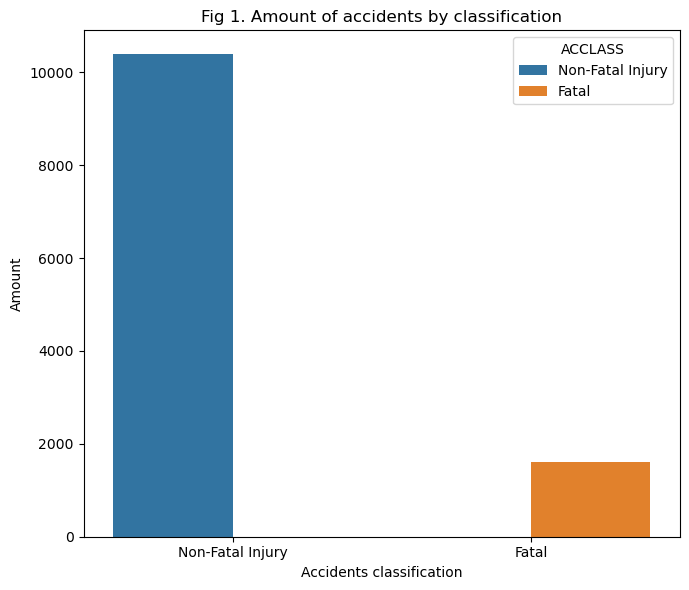

In [447]:
#show amount of accidents injury between fatal and non-fatal

#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='ACCLASS', hue='ACCLASS')
#add title
plt.title('Fig 1. Amount of accidents by classification')
# add x label
plt.xlabel('Accidents classification')
# add y label
plt.ylabel('Amount')
#tight layout
plt.tight_layout()
#show layout
plt.show()


As we can see here, most of the  accidents end up being nonfatal, so we should not expect that our predicted value get something like more 20% on fatal accidents 

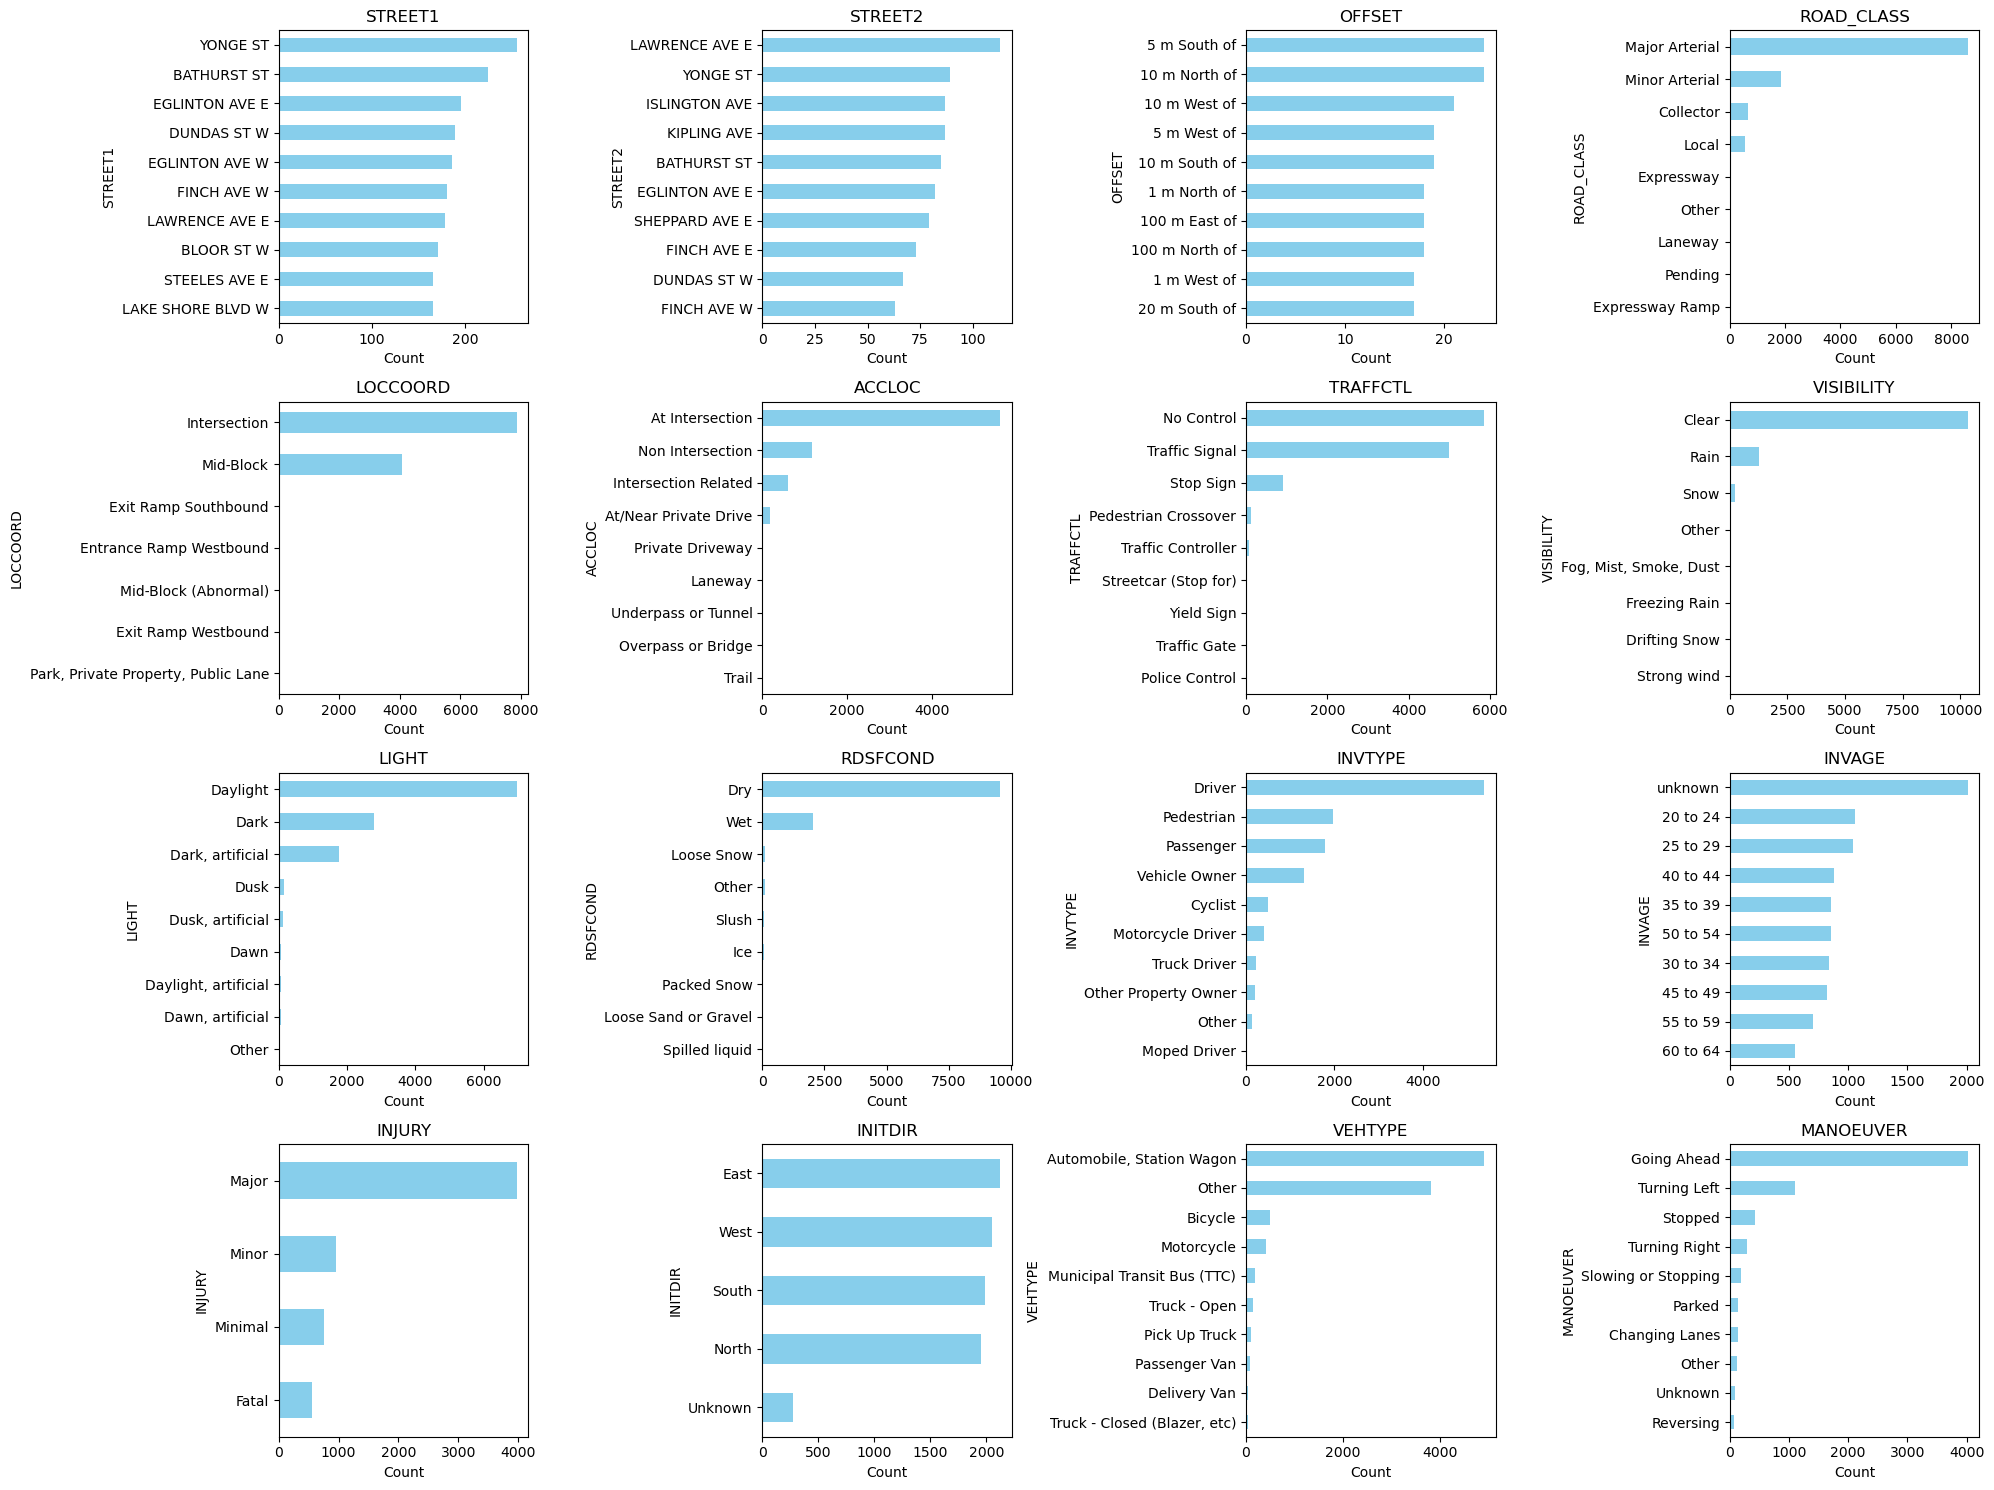

In [448]:
# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(4, 4, figsize=(20, 15))  # Adjust figure size as needed

# Define plot titles (replace with your desired titles)
plot_titles = ['STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 
                'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 
                'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
               'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER']

# Iterate through features and subplots
for i, (ax, title, feature_name) in enumerate(zip(axes.flat, plot_titles, ['STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 
                'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 
                'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
               'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER'])):
    # Assuming your features are categorical, get top 10 value counts
    data = train_set[feature_name].value_counts()[:10]

    # Create bar chart on each subplot
    data.plot(kind='barh', color='skyblue', ax=ax)

    # Set titles and labels (adjust based on your plot types)
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.invert_yaxis()  # Optional: Invert y-axis for readability

# Adjust layout (optional)
plt.tight_layout()

# Show the combined plot
plt.show()

In [449]:
#check time concurrency per intervals, like morning, afternoon, dinner 
zero_to_six = train_set[(train_set['TIME'] >= 0)  & (train_set['TIME'] <= 600) ]
six_to_noon = train_set[(train_set['TIME'] > 600)  & (train_set['TIME'] <= 1200) ]
noon_to_evening = train_set[(train_set['TIME'] > 1200)  & (train_set['TIME'] <=1800) ]
evening_to_midnight = train_set[(train_set['TIME'] > 1800)  & (train_set['TIME'] <=2400) ]


print('accidents between midnight to 6:00am -> '  + str( zero_to_six['TIME'].count()))
print('accidents between 6:00 am to 12:00 pm -> ' + str( six_to_noon['TIME'].count()))
print('accidents between 12:00pm  to 18:00pm -> ' + str(noon_to_evening['TIME'].count()))
print('accidents between 18:00pm  to 24:00pm -> ' + str(evening_to_midnight['TIME'].count()))
print ('\n')
print('accidents between midnight to 6:00am -> '  + str( zero_to_six.groupby('ACCLASS').size()))
print('accidents between 6:00 am to 12:00 pm -> ' + str( six_to_noon.groupby('ACCLASS').size()))
print('accidents between 12:00pm  to 18:00pm -> ' + str(noon_to_evening.groupby('ACCLASS').size()))
print('accidents between 18:00pm  to 24:00pm -> ' + str(evening_to_midnight.groupby('ACCLASS').size()))


#as we can see most of the accidents happen betweent 12:00pm  to 18:00pm and  18:00pm  to 24:00pm 

accidents between midnight to 6:00am -> 1693
accidents between 6:00 am to 12:00 pm -> 2755
accidents between 12:00pm  to 18:00pm -> 4045
accidents between 18:00pm  to 24:00pm -> 3507


accidents between midnight to 6:00am -> ACCLASS
Fatal                275
Non-Fatal Injury    1418
dtype: int64
accidents between 6:00 am to 12:00 pm -> ACCLASS
Fatal                403
Non-Fatal Injury    2352
dtype: int64
accidents between 12:00pm  to 18:00pm -> ACCLASS
Fatal                480
Non-Fatal Injury    3565
dtype: int64
accidents between 18:00pm  to 24:00pm -> ACCLASS
Fatal                460
Non-Fatal Injury    3047
dtype: int64


As we can see, most of the accidents happened during the afternoon (12:00 pm - 6:00 pm) and at night  (6:00 pm - 12:00am )

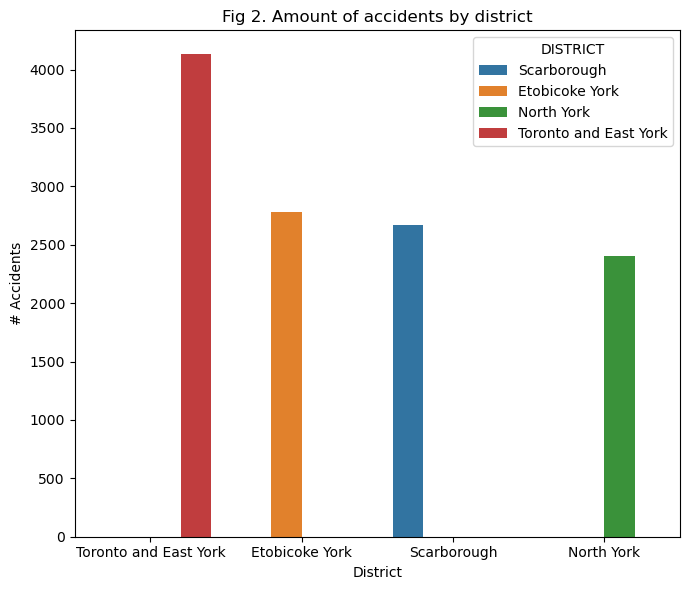

In [450]:
#show amount of accidents divide by district

#select size
plt.figure(figsize=(7, 6))
#use seaborn to add data and columns
sns.countplot(data=train_set, x='DISTRICT', hue='DISTRICT', order=train_set['DISTRICT'].value_counts().index )
#add title
plt.title('Fig 2. Amount of accidents by district')
# add x label
plt.xlabel('District')
# add y label
plt.ylabel('# Accidents')
#tight layout
plt.tight_layout()
#show layout
plt.show()



Getting to know the distribution of the accidents between the districts confirms a thought I had, and it is that the bigger the district, the more accidents usually happen, this theory might not apply to all but in this case it does

In [451]:
#group information by 'LOCCOORD','ACCLASS' and do a count on each distinct value
zero_to_six= zero_to_six.groupby(['LOCCOORD','ACCLASS']).size().reset_index(name='accident')
six_to_noon= six_to_noon.groupby(['LOCCOORD','ACCLASS']).size().reset_index(name='accident')
noon_to_evening= six_to_noon.groupby(['LOCCOORD','ACCLASS']).size().reset_index(name='accident')
evening_to_midnight= six_to_noon.groupby(['LOCCOORD','ACCLASS']).size().reset_index(name='accident')

#order results
zero_to_six.sort_values('accident', ascending=False, inplace=True)
six_to_noon.sort_values('accident', ascending=False, inplace=True)
noon_to_evening.sort_values('accident', ascending=False, inplace=True)
evening_to_midnight.sort_values('accident', ascending=False, inplace=True)



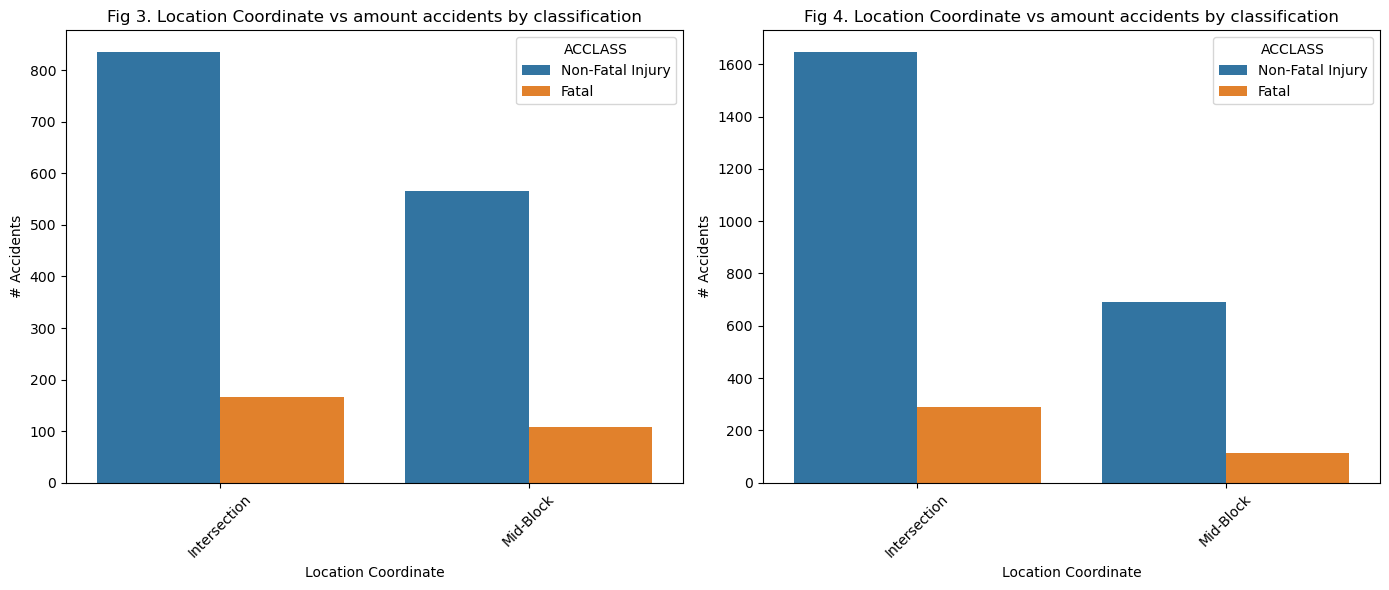

In [452]:
# Creating subplots
#indicate amount of plots and size
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))

#using seaborn plot location cordenate and amount accident by classification
sns.barplot(data=zero_to_six, x='LOCCOORD', y='accident', hue='ACCLASS', ax=ax1)
#add title
ax1.set_title('Fig 3. Location Coordinate vs amount accidents by classification')
#add x label
ax1.set_xlabel('Location Coordinate')
#add y label
ax1.set_ylabel('# Accidents')
#rotate labels 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#using seaborn plot location cordenate and amount accident by classification
sns.barplot(data=six_to_noon[(six_to_noon['LOCCOORD'] == 'Intersection') | (six_to_noon['LOCCOORD'] == 'Mid-Block')], x='LOCCOORD', y='accident', hue='ACCLASS', ax=ax2)
#add title
ax2.set_title('Fig 4. Location Coordinate vs amount accidents by classification')
#add x label
ax2.set_xlabel('Location Coordinate')
#add y label
ax2.set_ylabel('# Accidents')
#rotate labels 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)



# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()







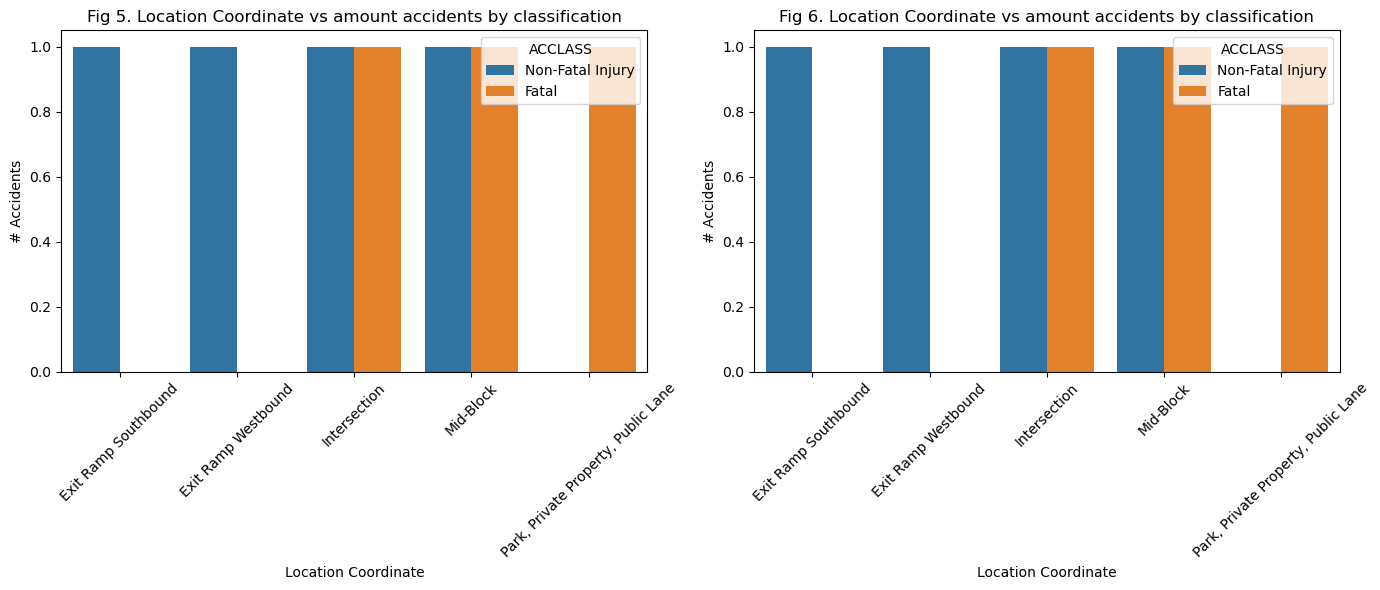

In [453]:
#indicate amount of plots and size
fig, (ax3, ax4) = plt.subplots(1,2, figsize=(14, 6))

#using seaborn plot location cordenate and amount accident by classification
sns.barplot(data=noon_to_evening, x='LOCCOORD', y='accident', hue='ACCLASS', ax=ax3)
#add title
ax3.set_title('Fig 5. Location Coordinate vs amount accidents by classification')
#add x label
ax3.set_xlabel('Location Coordinate')
#add y label
ax3.set_ylabel('# Accidents')
#rotate labels 
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

#using seaborn plot location cordenate and amount accident by classification
sns.barplot(data=evening_to_midnight, x='LOCCOORD', y='accident', hue='ACCLASS', ax=ax4)
#add title
ax4.set_title('Fig 6. Location Coordinate vs amount accidents by classification')
#add x label
ax4.set_xlabel('Location Coordinate')
#add y label
ax4.set_ylabel('# Accidents')
#rotate labels 
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


As we can see most of the accidents happen in major intersections or midblock 

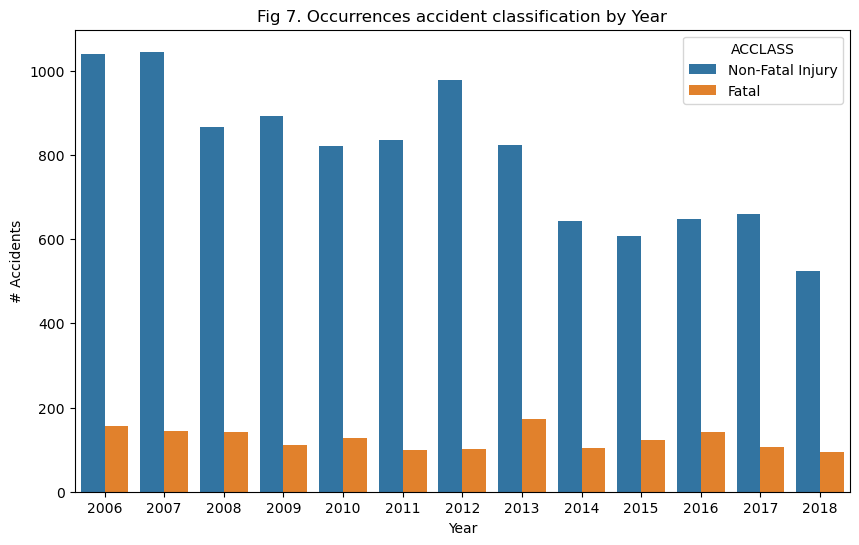

In [454]:
#how many of fatal and no fatal accidente occurred by year?
acclass_year = train_set.groupby(['YEAR','ACCLASS']).size().reset_index(name='accident')

acclass_year.sort_values('accident', ascending=False, inplace=True)

#select figure size
plt.figure(figsize=(10, 6))
sns.barplot(data=acclass_year, x='YEAR', y='accident', hue='ACCLASS')
#add details to graph 
plt.title('Fig 7. Occurrences accident classification by Year')
#add x label
plt.xlabel('Year')
#add y label
plt.ylabel('# Accidents')
#show image
plt.show()

As we can see in the Fig 1, most of the accidents aren't fatal, we could say that about 200-300 per year were fatal

No relation exist between the years and the number of accidents that happen, so we cannot say that in the next following year accidents might increase or decrease 

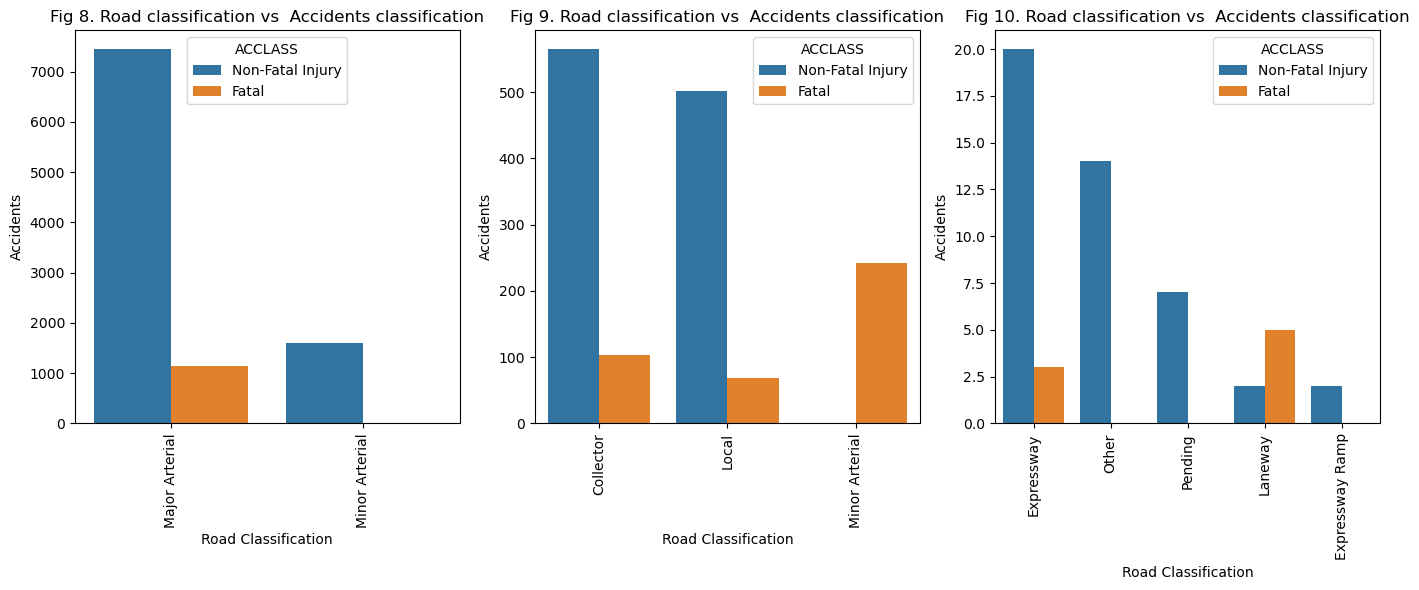

In [455]:

#Relation between Road classification and accident type
#which roads have high chances of getting fatal or non-fatal injury
acclass_road_class = train_set.groupby(['ROAD_CLASS','ACCLASS']).size().reset_index(name='accident')

acclass_road_class_less_50 = acclass_road_class[acclass_road_class['accident'] <=50].copy()
acclass_road_class_more_50 = acclass_road_class[(acclass_road_class['accident'] >50) & (acclass_road_class['accident'] <800) ].copy()
acclass_road_class_more_800 = acclass_road_class[acclass_road_class['accident'] >=800].copy()


acclass_road_class_less_50.sort_values('accident', ascending=False, inplace=True)
acclass_road_class_more_50.sort_values('accident', ascending=False, inplace=True)
acclass_road_class_more_800.sort_values('accident', ascending=False, inplace=True)


# Creating subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 , figsize=(14, 6))

#graph
sns.barplot(data=acclass_road_class_more_800, x='ROAD_CLASS', y='accident', hue='ACCLASS', ax=ax1)
ax1.set_title('Fig 8. Road classification vs  Accidents classification')
ax1.set_xlabel('Road Classification')
ax1.set_ylabel('Accidents')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plotting data for greater than or equal to 2000 accidents
sns.barplot(data=acclass_road_class_more_50, x='ROAD_CLASS', y='accident', hue='ACCLASS', ax=ax2)
ax2.set_title('Fig 9. Road classification vs  Accidents classification')
ax2.set_xlabel('Road Classification')
ax2.set_ylabel('Accidents')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Plotting data for greater than or equal to 2000 accidents
sns.barplot(data=acclass_road_class_less_50, x='ROAD_CLASS', y='accident', hue='ACCLASS', ax=ax3)
ax3.set_title('Fig 10. Road classification vs  Accidents classification')
ax3.set_xlabel('Road Classification')
ax3.set_ylabel('Accidents')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()



This one relates to Location coordinates, because it shows the same information in a different way

In [456]:
import folium
from folium.plugins import HeatMap
from folium import MacroElement
from jinja2 import Template


# use folium map to show a heatmap of the collisions
#set the latitude and longitude of toronto
toronto_heatmap = folium.Map(location=[43.7, -79.4], zoom_start=11)

# for the heat map we are going to divide the dataset into fatal and non-fatal
#since each will take different color 
fatal = train_set[train_set['ACCLASS'] == 'Fatal']
non_fatal = train_set[train_set['ACCLASS'] == 'Non-Fatal Injury']

# create heatmaps for fatal and non-fatal accidents
heat_fatal = [[row['LATITUDE'], row['LONGITUDE']] for index, row in fatal.iterrows()]
heat_non_fatal = [[row['LATITUDE'], row['LONGITUDE']] for index, row in non_fatal.iterrows()]

# Add heatmaps to the map
HeatMap(heat_fatal, radius=10, blur=5).add_to(toronto_heatmap)
HeatMap(heat_non_fatal, radius=10, blur=5).add_to(toronto_heatmap)


#for the legend a macro is used, it allow us to add html code to create it
# Add legend
template = """
{% macro html(this, kwargs) %}
<div style="position: fixed; bottom: 50px; right: 50px; z-index:9999; font-size:14px; background-color:rgba(255, 255, 255, 0.7); border-radius: 5px; border: 2px solid grey; padding: 10px;">
  <p><b>Legend</b></p>
  <p><b>ACCLASS</b></p>
  <p>Blue - Fatal </p>
  <p>Orange - Non-Fatal</p>
</div>
<div>
{% endmacro %}
"""
#add macro to the map
macro = MacroElement()
macro._template = Template(template)
toronto_heatmap.get_root().add_child(macro)
# Display the map
toronto_heatmap


Through this heatmap we can see a more visual representation of the accidents and the locations that trend to accidents 

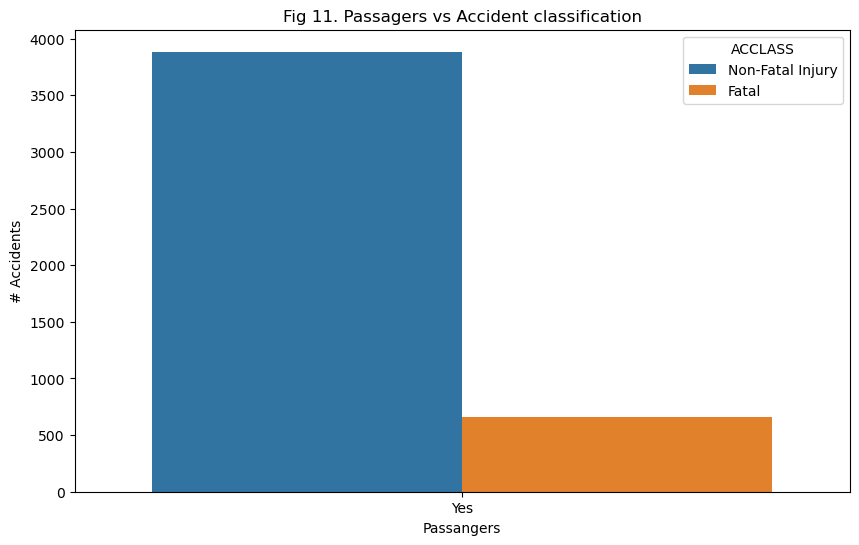

In [457]:
#wonder if PASSENGER is related to fatal or not 
passangers= train_set.groupby(['PASSENGER','ACCLASS']).size().reset_index(name='accident')

#order results
passangers.sort_values('accident', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=passangers, x='PASSENGER', y='accident', hue='ACCLASS')
#add title
plt.title('Fig 11. Passagers vs Accident classification')
#add x label
plt.xlabel('Passangers')
#add y label
plt.ylabel('# Accidents')
#rotate labels 
plt.show()


If the driver has passengers or not does not make the accident trend to faltal

/var/folders/3c/4jp44td56g5bg52_nbjdy4gh0000gn/T/ipykernel_8594/471512376.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


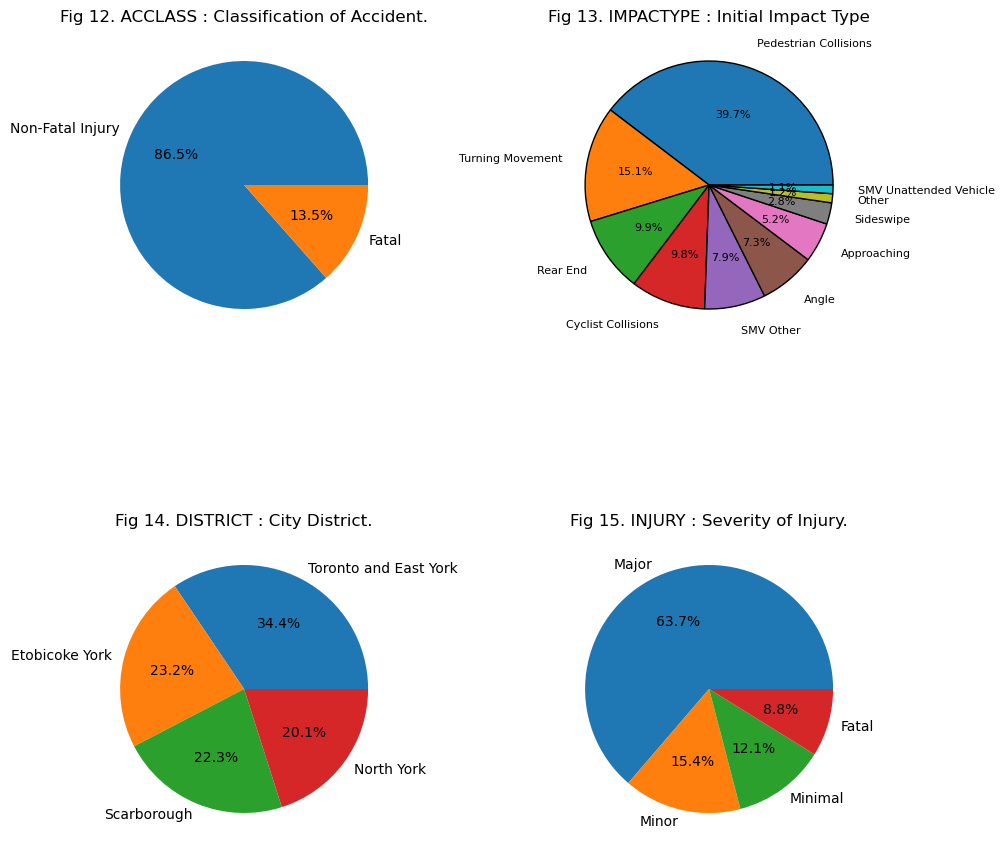

In [594]:
# Create the figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12), gridspec_kw={'wspace': 0.5, 'hspace': 0.2}) 


# Get data for pie charts from separate columns
pie1_data = train_set['ACCLASS'].value_counts(normalize=True)  # Group by category and sum values
pie2_data = train_set['IMPACTYPE'].value_counts(normalize=True) # Use entire 'Value' column

pie4_data = train_set['INJURY'].value_counts(normalize=True) # Use entire 'Value' column
pie3_data = train_set['DISTRICT'].value_counts(normalize=True) # Use entire 'Value' column

# Create pie charts 
ax1.pie(pie1_data, labels=pie1_data.index, autopct="%1.1f%%")
ax1.set_title("Fig 12. ACCLASS : Classification of Accident.")

ax2.pie(pie2_data, labels=pie2_data.index, autopct="%1.1f%%", wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, textprops={'fontsize': 8}, labeldistance=1.2)
ax2.set_title("Fig 13. IMPACTYPE : Initial Impact Type")



ax3.pie(pie3_data, labels=pie3_data.index, autopct="%1.1f%%", labeldistance=1.1)
ax3.set_title("Fig 14. DISTRICT : City District.")

ax4.pie(pie4_data, labels=pie4_data.index, autopct="%1.1f%%")
ax4.set_title("Fig 15. INJURY : Severity of Injury.")

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

#### 3. Identify target feature


As we have seen in the exploratory analysis, all graphs were related to accident classification ACCLASS, which is our target variable, and all the solutions will be focused on trying to predict if the accident will end up being fatal or non-fatal 

#### 4. Usefulness of data

The data provided show important insights, starting from the road classification, which indicates that most accidents happen on more prominent streets like significant arterials. In the same way, the district is related to the number of accidents that occur during the year. 

Right away discarding any feature will be a mistake since all the data is considered as truthful and adds value to the decision of an accident being fatal or non-fatal 

### III. Prepare data 
1. Clean the data:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Perform feature engineering, where appropriate:
• Discretize continuous features.
• Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
• Aggregate features into promising new features.
3. Perform feature selection (optional):
• Drop the attributes that provide no useful information for the task.
4. Perform feature scaling:
• Standardize or normalize features.

#### 1. Clean the data

In [459]:
   
#create a class to handle the missing values, initially we will create a instance of the dataset and call each method
#as needed 
class CleanData:
    
    def __init__(self, dataset):
        self.dataset= dataset
        
        
    #this function will fill any binary feature that has values yes or no
    #the missing values will be assumed as "No"
    def fill_binary_value(self):
        #apply unique to the data set it will return all items with the amount of 
        #unique values 
        nunique_series = self.dataset.nunique()
        
        #loop the unique result, feature by feature
        for index, value in nunique_series.items():
            
            #if the feature amount is equals 1 then we procced
            if(value == 1):
                #get the feature values which are null, if bigger or equals 1 then procced
                if(self.dataset[index].isnull().sum() >= 1):
                    #fill missing values with "No"
                     self.dataset[index].fillna("No", inplace = True)

        #return changes apply to the data set               
        return self.dataset
    
    #this function will fill the values of a parametrized feature given a feature that relates to it
    #ex given the NEIGHBOURHOOD_140 and DISTRICT determine the missing values of DISTRICT 
    def fill_value_by_given_feature( self, given_feature, feature_to_fill):
        #get the given_feature of the   null values of feature_to_fill 
        null_value = self.dataset[self.dataset[feature_to_fill].isnull()][given_feature].unique()

        #loop each value of given_feature
        for  value in null_value:
            
    #       #get the value to fill, given the dataset equals to value =given_feature and the not null values of feature_to_fill
            value_to_fill = self.dataset[(self.dataset[given_feature] == value) &  (self.dataset[feature_to_fill].notnull())].head(1)[feature_to_fill].values
            if(len(value_to_fill) > 0):
                #using loc fill the missing values using the value_to_fill as filler and 
                #filter by all null feature_to_fill which given_feature is equals to value_to_fill
                self.dataset.loc[(self.dataset[given_feature] == value) & (self.dataset[feature_to_fill].isnull() ) ,feature_to_fill]= value_to_fill[0]

        #return changes apply to the data set               
        return self.dataset
    
    #fill the missing values based on two features of that missing value
    def fill_value_based_2_given_feature( self, first_feature, second_feature, feature_to_fill):
        
        #get first_feature, second_feature, of the feature_to_fill null values
        null_value = self.dataset[self.dataset[feature_to_fill].isnull()][[first_feature,second_feature]]

        #loop each result of the feature_to_fill results 
        for index,row in null_value.iterrows():            
            #get value to fill out the missing values
            value_to_fill = self.dataset[(self.dataset[first_feature] == row[first_feature]) & (self.dataset[second_feature] == row[second_feature]) &  (self.dataset[feature_to_fill].notnull())].head(1)[feature_to_fill].values
            
            #only update if results are bigger than 0 
            if(len(value_to_fill) >0):
                
                #using loc, update the missing values
                self.dataset.loc[(self.dataset[first_feature] == row[first_feature]) & (self.dataset[second_feature] == row[second_feature]) & (self.dataset[feature_to_fill].isnull() ) ,feature_to_fill] = value_to_fill[0]

        #return changes apply to the data set               
        return self.dataset
    
    #we will fill the dataset given a specific value and in some cases only a portion of the missing values 
    #also takes two extra pameters that indicates an extra filter
    def fill_by_given_value(self, feature_to_fill, given_value, qty =0, filter_feature ='', value_filter ='' ):
        
        #if there is a specific amount to update, it will be then select that amount
        if(qty > 0 ):
            
            #check if a second filter will be applied
            if filter_feature and value_filter:
                
                #filter by feature_to_fill null values only and filter_feature -> value_filter
                #using head we the the specific amount indicated 
                index_to_update = self.dataset[(self.dataset[feature_to_fill].isnull()) & (self.dataset[filter_feature] == value_filter)].head(qty).index

            #check if a second filter will be applied
            else:
                
                #filter by feature_to_fill null values only and filter_feature -> value_filter
                #using head we the the specific amount indicated 
                index_to_update = self.dataset[self.dataset[feature_to_fill].isnull()].head(qty).index
            
            #update  by index  using loc
            if(index_to_update.any()):
                self.dataset.loc[index_to_update, feature_to_fill] = str(given_value)
        else:
            #fill everything without taking the qty
            
            #check if a second filter will be applied
            if filter_feature and value_filter:
                
                #filter by feature_to_fill null values only and filter_feature -> value_filter
                index_to_update = self.dataset[(self.dataset[feature_to_fill].isnull()) & (self.dataset[filter_feature] == value_filter)].index

            #check if a second filter will be applied
            else:
                
                #filter by feature_to_fill null values 
                index_to_update = self.dataset[self.dataset[feature_to_fill].isnull()].index
            
            #update  by index  using loc
            if(index_to_update.any()):
                self.dataset.loc[index_to_update, feature_to_fill] = str(given_value) 
              
         #return changes apply to the data set        
        return self.dataset
    
    #after we end cleaning we can save the dataset in a csv file for future consults          
    def save_to_csv(self,title):
        self.dataset.to_csv(f'{title}.csv', index=False)
        
           

In [460]:
#create a copy of train 
transform_df = train_set.copy()


In [461]:
transform_df.shape

(12000, 55)

#### Missing values

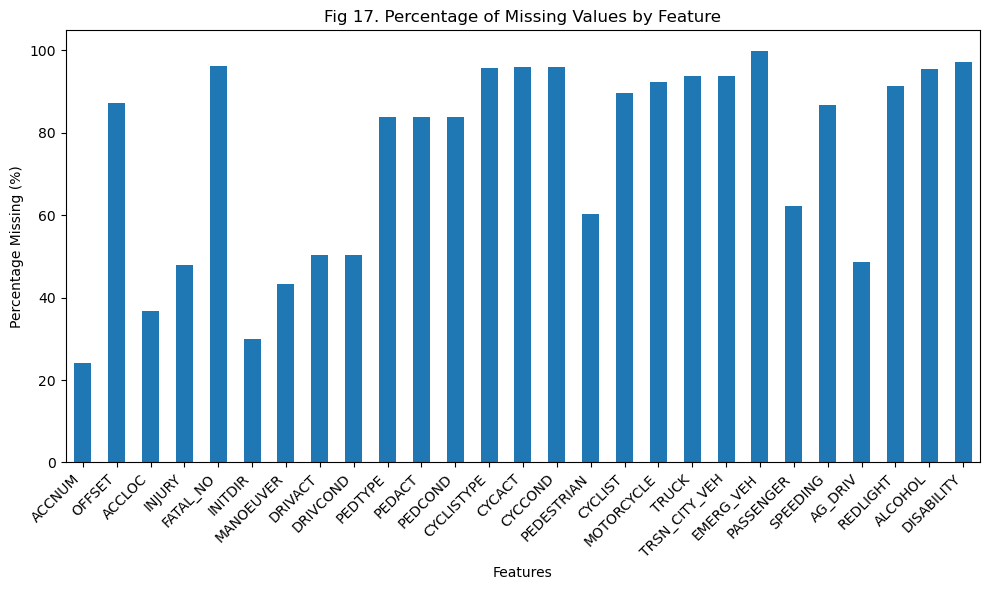

In [462]:
#show the amount of missing values we have in the dataset
# Calculate the percentage of missing values for each feature
missing_percentage = (train_set.isnull().sum() / len(train_set)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
#plot percentage of missing values 
missing_percentage[missing_percentage > 15].plot(kind='bar')
plt.title('Fig 17. Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [463]:
#handle missing values for binary features 

#in this case we asume the missing values for binary feature as no

#fill all binary values change NaN with no
clean_df=  CleanData(transform_df)
transform_df = clean_df.fill_binary_value()

#fill missing district the labels that has same  NEIGHBOURHOOD_140 and district full
transform_df = clean_df.fill_value_by_given_feature( 'NEIGHBOURHOOD_140','DISTRICT' )

#filling missing value ROAD_CLASS base on the combination STREET2, NEIGHBOURHOOD_140
transform_df = clean_df.fill_value_based_2_given_feature('STREET2','NEIGHBOURHOOD_140','ROAD_CLASS')


#fill missing values with a specific value 
#specify feature  to fill, value to fill 
transform_df = clean_df.fill_by_given_value('ROAD_CLASS','Major Arterial')
transform_df = clean_df.fill_by_given_value('VEHTYPE','Other')
transform_df = clean_df.fill_by_given_value('MANOEUVER','Other')
transform_df = clean_df.fill_by_given_value('DRIVACT' ,'Other')
transform_df = clean_df.fill_by_given_value('DRIVCOND','Other')
transform_df = clean_df.fill_by_given_value('VISIBILITY','Other')
transform_df = clean_df.fill_by_given_value('RDSFCOND','Other')
transform_df = clean_df.fill_by_given_value('INVTYPE','Other')
transform_df = clean_df.fill_by_given_value('INITDIR','Unknown')

#fill missing value base on value of specific feature 
#specify feature to fill, value to fill, amount of missing values to fill, fillter feature and value of that filter

transform_df = clean_df.fill_by_given_value('INJURY','Major',1500, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',700, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',700, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Driver')

transform_df = clean_df.fill_by_given_value('INJURY','None',0, 'INVTYPE','Vehicle Owner')

transform_df = clean_df.fill_by_given_value('INJURY','Major',250, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',150, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',100, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Passenger')

transform_df = clean_df.fill_by_given_value('INJURY','None')


#STREET2 is only field if the accident happen in a street near a corner or intersection, if accident happened 
#in a public or private place then STREET2 is empty 
transform_df['STREET2'].fillna('', inplace=True)

#fill missing values with fast forward 
transform_df['LOCCOORD'].fillna( method='ffill' , inplace= True)
transform_df['ACCLOC'].fillna( method='ffill' , inplace= True)

#rest of missing values for this 2 features apply most common
transform_df = clean_df.fill_by_given_value('ACCLOC','At Intersection')
transform_df = clean_df.fill_by_given_value('TRAFFCTL','No Control')


#Note. this same steps will be apply to test set 

#### 2. Perform feature engineering

The date will be extracted into Day, Month, Year, Hour, Minutes, Seconds

In [464]:
#apply feature extraction to date, separate them into MONTH, DAY, HOUR, MINUTE, SECOND
transform_df['DATE'] = pd.to_datetime(transform_df['DATE'] )

transform_df['MONTH'] = transform_df['DATE'].dt.month
transform_df['DAY'] = transform_df['DATE'].dt.day
transform_df['HOUR'] = transform_df['DATE'].dt.hour
transform_df['MINUTE'] = transform_df['DATE'].dt.minute
transform_df['SECOND'] = transform_df['DATE'].dt.second


transform_df['MONTH'] = transform_df['MONTH'].astype('int64')
transform_df['DAY'] = transform_df['DAY'].astype('int64')
transform_df['MINUTE'] = transform_df['MINUTE'].astype('int64')
transform_df['HOUR'] = transform_df['HOUR'].astype('int64')
transform_df['SECOND'] = transform_df['SECOND'].astype('int64')




#### 3. Perform feature selection
Remove columns 

In [465]:
#due to the percentage of missing values we decided to drop the columns 
#we apply date feature extraction, that's why is being dropped
transform_df.drop(columns=['DATE','OFFSET','FATAL_NO','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND'], inplace=True)

#this does not add any informational value
transform_df.drop(columns=['ACCNUM','INDEX_'], inplace=True)

#for this part we will remove the target variable from the dataset 
transform_df.drop(columns=['ACCLASS'], inplace=True)

#OFFSET               87.316667
# PEDTYPE              83.533333
# PEDACT               83.583333
# PEDCOND              83.650000
# CYCLISTYPE           95.725000
# CYCACT               95.825000
# CYCCOND              95.833333

In [466]:
#check if any missing value left  
transform_df.isnull().sum()

YEAR                 0
TIME                 0
STREET1              0
STREET2              0
ROAD_CLASS           0
DISTRICT             0
WARDNUM              0
LATITUDE             0
LONGITUDE            0
LOCCOORD             0
ACCLOC               0
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
IMPACTYPE            0
INVTYPE              0
INVAGE               0
INJURY               0
INITDIR              0
VEHTYPE              0
MANOEUVER            0
DRIVACT              0
DRIVCOND             0
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER            0
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
HOOD_158             0
NEIGHBOURHOOD_158    0
HOOD_140             0
NEIGHBOURHOOD_140    0
DIVISION             0
ObjectId             0
MONTH      

In [467]:
#check dimenssions
transform_df.shape

(12000, 48)

In [468]:
#save clean dataset for easy access 
clean_df.save_to_csv('clean_X_train')

In [469]:
#remove IDS from train and test 

#keeep id for future use
X_train_IDS = transform_df['ObjectId']

#remove ID
X_train= transform_df.drop(columns=['ObjectId'] )
X_train.shape

(12000, 47)

#### clean test dataset

Since the steps of cleaning where only apply to the train dataset we will do the same for the test dataset 

In [470]:
#check shape
X_test.shape

(3000, 55)

In [471]:
#check null values
X_test.isnull().sum()



INDEX_                  0
ACCNUM                793
YEAR                    0
DATE                    0
TIME                    0
STREET1                 0
STREET2               261
OFFSET               2594
ROAD_CLASS             72
DISTRICT                3
WARDNUM                 0
LATITUDE                0
LONGITUDE               0
LOCCOORD               18
ACCLOC               1050
TRAFFCTL                5
VISIBILITY              5
LIGHT                   0
RDSFCOND                6
ACCLASS                 0
IMPACTYPE               0
INVTYPE                 1
INVAGE                  0
INJURY               1426
FATAL_NO             2872
INITDIR               899
VEHTYPE               431
MANOEUVER            1316
DRIVACT              1536
DRIVCOND             1535
PEDTYPE              2488
PEDACT               2492
PEDCOND              2494
CYCLISTYPE           2867
CYCACT               2870
CYCCOND              2870
PEDESTRIAN           1793
CYCLIST              2675
AUTOMOBILE  

In [472]:
#procced to clean my test  apply same steps that was apply on train  

#create a copy
transform_df = X_test.copy()

#handle missing values for binary features 

#in this case we asume the missing values for binary feature as no

#fill all binary values change NaN with no
clean_df=  CleanData(transform_df)
transform_df = clean_df.fill_binary_value()

#fill missing district the labels that has same  NEIGHBOURHOOD_140 and district full
transform_df = clean_df.fill_value_by_given_feature( 'NEIGHBOURHOOD_140','DISTRICT' )

#filling missing value ROAD_CLASS base on the combination STREET2, NEIGHBOURHOOD_140
transform_df = clean_df.fill_value_based_2_given_feature('STREET2','NEIGHBOURHOOD_140','ROAD_CLASS')


#fill missing values with a specific value 
#specify feature  to fill, value to fill 
transform_df = clean_df.fill_by_given_value('ROAD_CLASS','Major Arterial')
transform_df = clean_df.fill_by_given_value('VEHTYPE','Other')
transform_df = clean_df.fill_by_given_value('MANOEUVER','Other')
transform_df = clean_df.fill_by_given_value('DRIVACT' ,'Other')
transform_df = clean_df.fill_by_given_value('DRIVCOND','Other')
transform_df = clean_df.fill_by_given_value('VISIBILITY','Other')
transform_df = clean_df.fill_by_given_value('RDSFCOND','Other')
transform_df = clean_df.fill_by_given_value('INVTYPE','Other')
transform_df = clean_df.fill_by_given_value('INITDIR','Unknown')

#fill missing value base on value of specific feature 
#specify feature to fill, value to fill, amount of missing values to fill, fillter feature and value of that filter

transform_df = clean_df.fill_by_given_value('INJURY','Major',1500, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',700, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',700, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Driver')

transform_df = clean_df.fill_by_given_value('INJURY','None',0, 'INVTYPE','Vehicle Owner')

transform_df = clean_df.fill_by_given_value('INJURY','Major',250, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',150, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',100, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Passenger')

transform_df = clean_df.fill_by_given_value('INJURY','None')


#STREET2 is only field if the accident happen in a street near a corner or intersection, if accident happened 
#in a public or private place then STREET2 is empty 
transform_df['STREET2'].fillna('', inplace=True)

#fill missing values with fast forward 
transform_df['LOCCOORD'].fillna( method='ffill' , inplace= True)
transform_df['ACCLOC'].fillna( method='ffill' , inplace= True)

#rest of missing values for this 2 features apply most common
transform_df = clean_df.fill_by_given_value('ACCLOC','At Intersection')
transform_df = clean_df.fill_by_given_value('TRAFFCTL','No Control')


#Note. this same steps will be apply to test set 

In [473]:
#apply feature extraction to date, separate them into MONTH, DAY, HOUR, MINUTE, SECOND
transform_df['DATE'] = pd.to_datetime(transform_df['DATE'] )

transform_df['MONTH'] = transform_df['DATE'].dt.month
transform_df['DAY'] = transform_df['DATE'].dt.day
transform_df['HOUR'] = transform_df['DATE'].dt.hour
transform_df['MINUTE'] = transform_df['DATE'].dt.minute
transform_df['SECOND'] = transform_df['DATE'].dt.second


transform_df['MONTH'] = transform_df['MONTH'].astype('int64')
transform_df['DAY'] = transform_df['DAY'].astype('int64')
transform_df['MINUTE'] = transform_df['MINUTE'].astype('int64')
transform_df['HOUR'] = transform_df['HOUR'].astype('int64')
transform_df['SECOND'] = transform_df['SECOND'].astype('int64')



In [474]:
#due to the percentage of missing values we decided to drop the columns 
#we apply date feature extraction, that's why is being dropped
transform_df.drop(columns=['DATE','OFFSET','FATAL_NO','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND'], inplace=True)

#this does not add any informational value
transform_df.drop(columns=['ACCNUM','INDEX_'], inplace=True)


#for this part we will remove the target variable from the dataset 
transform_df.drop(columns=['ACCLASS'], inplace=True)


#OFFSET               87.316667
# PEDTYPE              83.533333
# PEDACT               83.583333
# PEDCOND              83.650000
# CYCLISTYPE           95.725000
# CYCACT               95.825000
# CYCCOND              95.833333

In [475]:
#save clean dataset for easy access 
clean_df.save_to_csv('clean_X_test')

In [476]:
#remove IDS from train and test 

X_test_IDS = transform_df['ObjectId']

X_test= transform_df.drop(columns=['ObjectId'] )
X_test.shape

(3000, 47)

#### Clean Kaggle test dataset 

In [477]:
#make a copy of X test 

transform_df = test_df.copy()

In [478]:
transform_df.shape

(3194, 54)

In [479]:
transform_df.isnull().sum()

INDEX_                  0
ACCNUM               1232
YEAR                    0
DATE                    0
TIME                    0
STREET1                 0
STREET2               341
OFFSET               1720
ROAD_CLASS             19
DISTRICT               91
WARDNUM               862
LATITUDE                0
LONGITUDE               0
LOCCOORD                5
ACCLOC                  0
TRAFFCTL                5
VISIBILITY              6
LIGHT                   0
RDSFCOND                6
IMPACTYPE               4
INVTYPE                 6
INVAGE                  0
INJURY               1378
FATAL_NO             2960
INITDIR               554
VEHTYPE              1173
MANOEUVER            1146
DRIVACT              1376
DRIVCOND             1375
PEDTYPE              2594
PEDACT               2562
PEDCOND              2555
CYCLISTYPE           3055
CYCACT               3049
CYCCOND              3049
PEDESTRIAN           1806
CYCLIST              2866
AUTOMOBILE            316
MOTORCYCLE  

In [480]:
#handle missing values for binary features 

#in this case we asume the missing values for binary feature as no

#fill all binary values change NaN with no
clean_df=  CleanData(transform_df)
transform_df = clean_df.fill_binary_value()

#fill missing district the labels that has same  NEIGHBOURHOOD_140 and district full
transform_df = clean_df.fill_value_by_given_feature( 'NEIGHBOURHOOD_140','DISTRICT' )

#filling missing value ROAD_CLASS base on the combination STREET2, NEIGHBOURHOOD_140
transform_df = clean_df.fill_value_based_2_given_feature('STREET2','NEIGHBOURHOOD_140','ROAD_CLASS')


#fill missing values with a specific value 
#specify feature  to fill, value to fill 
transform_df = clean_df.fill_by_given_value('ROAD_CLASS','Major Arterial')
transform_df = clean_df.fill_by_given_value('VEHTYPE','Other')
transform_df = clean_df.fill_by_given_value('MANOEUVER','Other')
transform_df = clean_df.fill_by_given_value('DRIVACT' ,'Other')
transform_df = clean_df.fill_by_given_value('DRIVCOND','Other')
transform_df = clean_df.fill_by_given_value('VISIBILITY','Other')
transform_df = clean_df.fill_by_given_value('RDSFCOND','Other')
transform_df = clean_df.fill_by_given_value('INVTYPE','Other')
transform_df = clean_df.fill_by_given_value('INITDIR','Unknown')

#fill missing value base on value of specific feature 
#specify feature to fill, value to fill, amount of missing values to fill, fillter feature and value of that filter

#for the test I change the portion to assign to each value 
transform_df = clean_df.fill_by_given_value('INJURY','Major',400, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',150, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',150, 'INVTYPE','Driver')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Driver')

transform_df = clean_df.fill_by_given_value('INJURY','None',0, 'INVTYPE','Vehicle Owner')

transform_df = clean_df.fill_by_given_value('INJURY','Major',60, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minor',60, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Minimal',20, 'INVTYPE','Passenger')
transform_df = clean_df.fill_by_given_value('INJURY','Fatal',0, 'INVTYPE','Passenger')


transform_df = clean_df.fill_by_given_value('INJURY','None')


#STREET2 is only field if the accident happen in a street near a corner or intersection, if accident happened 
#in a public or private place then STREET2 is empty 
transform_df['STREET2'].fillna('', inplace=True)

#fill missing values with fast forward 
transform_df['LOCCOORD'].fillna( method='ffill' , inplace= True)
transform_df['ACCLOC'].fillna( method='ffill' , inplace= True)
transform_df['DISTRICT'].fillna( method='ffill' , inplace= True)
transform_df['WARDNUM'].fillna( method='ffill' , inplace= True)
transform_df['IMPACTYPE'].fillna( method='ffill' , inplace= True)




#rest of missing values for this 2 features apply most common
transform_df = clean_df.fill_by_given_value('ACCLOC','At Intersection')
transform_df = clean_df.fill_by_given_value('TRAFFCTL','No Control')




In [481]:
#apply feature extraction to date, separate them into MONTH, DAY, HOUR, MINUTE, SECOND
transform_df['DATE'] = pd.to_datetime(transform_df['DATE'] )

transform_df['MONTH'] = transform_df['DATE'].dt.month
transform_df['DAY'] = transform_df['DATE'].dt.day
transform_df['HOUR'] = transform_df['DATE'].dt.hour
transform_df['MINUTE'] = transform_df['DATE'].dt.minute
transform_df['SECOND'] = transform_df['DATE'].dt.second


transform_df['MONTH'] = transform_df['MONTH'].astype('int64')
transform_df['DAY'] = transform_df['DAY'].astype('int64')
transform_df['MINUTE'] = transform_df['MINUTE'].astype('int64')
transform_df['HOUR'] = transform_df['HOUR'].astype('int64')
transform_df['SECOND'] = transform_df['SECOND'].astype('int64')



In [482]:
#due to the percentage of missing values we decided to drop the columns 
#we apply date feature extraction, that's why is being dropped
transform_df.drop(columns=['DATE','OFFSET','FATAL_NO','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND'], inplace=True)

#this does not add any informational value
transform_df.drop(columns=['ACCNUM','INDEX_'], inplace=True)


#OFFSET               87.316667
# PEDTYPE              83.533333
# PEDACT               83.583333
# PEDCOND              83.650000
# CYCLISTYPE           95.725000
# CYCACT               95.825000
# CYCCOND              95.833333

In [483]:
#save clean dataset for easy access 
clean_df.save_to_csv('clean_kaggle_test')

In [484]:
#remove IDS from train and test 

kaggle_test_IDS = transform_df['ObjectId']

kaggle_test= transform_df.drop(columns=['ObjectId'] )
kaggle_test.shape

(3194, 47)

In [485]:
#show values 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"kaggle_test.shape: {kaggle_test.shape}")

print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (12000, 47)
X_test.shape: (3000, 47)
kaggle_test.shape: (3194, 47)
y_train.shape: (12000,)
y_test.shape: (3000,)


In [486]:
#define categorical values and numerical
TARGET= 'ACCLASS'
#reload all feature as predictors 
columns_predictors = [col for col in X_train.columns if col not in [TARGET]]


print(f"TARGET: \n  {TARGET} \n")
print(f"PREDICTORS: \n {columns_predictors} \n")

TARGET: 
  ACCLASS 

PREDICTORS: 
 ['YEAR', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'] 



In [487]:

#select  numerical 
columns_numerical = ['YEAR','TIME','WARDNUM','LATITUDE','LONGITUDE','MONTH','DAY','HOUR','MINUTE','SECOND']
#select categorical ordinal 
columns_ordinal = ['INVAGE','INJURY']
#select categorical nominal  
columns_nominal = [col for col in columns_predictors if (col not in columns_numerical) & ( col not in columns_ordinal) ]


print(f"TARGET: \n  {TARGET} \n")
print(f"PREDICTORS: \n {columns_predictors} \n")
print(f"NOMINAL: \n  {columns_nominal} \n" )
print(f"ORDINAL: \n  {columns_ordinal} \n")
print(f"NUMERICAL: \n  {columns_numerical} \n")


TARGET: 
  ACCLASS 

PREDICTORS: 
 ['YEAR', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'] 

NOMINAL: 
  ['STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_

In [488]:
#Create numerical pipeline to transform numerical values
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import  OneHotEncoder, OrdinalEncoder ,StandardScaler


#Convert the non transformed Dataframe into list.
columns_nominal_list = list(columns_nominal)
columns_ordinal_list = list(columns_ordinal)
columns_numerical_list = list(columns_numerical)


#create a pipeline to apply different enconded to our data 
pipeline_nominal = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

pipeline_ordinal = Pipeline([
  ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])


#add all pipeline to the transformer
pipeline_full = ColumnTransformer([
  ("nominal", pipeline_nominal, columns_nominal_list),
  ("ordinal", pipeline_ordinal, columns_ordinal_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
    
])

In [489]:
#fit the pipeline 
pipeline_full.fit(X_train)

#apply the transformation
X_train_encoded = pipeline_full.transform(X_train)
X_test_encoded = pipeline_full.transform(X_test)
kaggle_test_encoded = pipeline_full.transform(kaggle_test)

#print new dimenssions
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"kaggle_test.shape: {kaggle_test.shape}")

print(f"X_train_encoded.shape: {X_train_encoded.shape}")
print(f"X_test_encoded.shape: {X_test_encoded.shape}")
print(f"kaggle_test_encoded.shape: {kaggle_test_encoded.shape}")


X_train.shape: (12000, 47)
X_test.shape: (3000, 47)
kaggle_test.shape: (3194, 47)
X_train_encoded.shape: (12000, 4611)
X_test_encoded.shape: (3000, 4611)
kaggle_test_encoded.shape: (3194, 4611)


since our targe variable is in string we will apply label encoder to get them into 0,1

In [490]:
from sklearn.preprocessing import LabelEncoder

#prepare target for feature selection, since our target is no binary we have to encoded to 0,1
le = LabelEncoder()
#fit enconder
le.fit(y_train)

#transform target variable
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)



print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

print(f"y_train_encoded.shape: {y_train_encoded.shape}")
print(f"y_test_encoded.shape: {y_test_encoded.shape}")

y_train.shape: (12000,)
y_test.shape: (3000,)
y_train_encoded.shape: (12000,)
y_test_encoded.shape: (3000,)


### IV. Select best ML models

1. Find best hyperparameters
2. Identify at least 4 models to apply 
3. Show feature importance for each model 
4. Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score


#### 1.Find best hyperparameters

In [491]:
#Evaluate the Decision tree model on the training set
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#apply hyperparameter tuning with GridSearchCV

critery_estimator_1 = ['gini', 'entropy']

#Establish the first Parameter.
roc_auc = []

for item in critery_estimator_1:
    #Create a DecisionTreeClassifier with the current criterion
    Dtree_clf = DecisionTreeClassifier(criterion=item, random_state=42)
    # Fit the classifier on the training data already encoded
    Dtree_clf.fit(X_train_encoded, y_train_encoded)

    
    #predict_proba() gives predicted probabilities of features belonging to each category
    #returns the probabilities to each class
    #using cross validation determine 
    y_probas_trees = cross_val_predict(Dtree_clf,X_train_encoded,y_train_encoded, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train_encoded,y_tree_scores)
    roc_auc.append(roc_auc_trees)
    

In [493]:
critery_estimator_1

['gini', 'entropy']

In [499]:
roc_auc_values[0:2]

[0.6597141244032947, 0.6919537094605359]

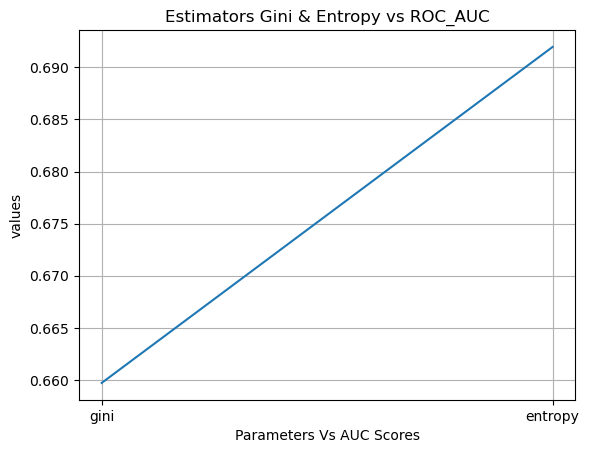

In [500]:
#Area Under the Receiver Operating Characteristic Curve 

plt.plot(critery_estimator_1, roc_auc_values[0:2]) 
#add title
plt.title('Estimators Gini & Entropy vs ROC_AUC')
#add y label
plt.ylabel('values')
#add x label 
plt.xlabel("Parameters Vs AUC Scores")
#show grid
plt.grid(True)
#show 
plt.show()

In [501]:
#get the best stimators with differents hyperparametters 
#criterion = giny and entropy
param_grid_forest_1 = {'criterion' : critery_estimator_1}
# Create GridSearchCV object
grid_search_1 = GridSearchCV(Dtree_clf, param_grid_forest_1, cv = 4, scoring='roc_auc', refit = True)
grid_search_1.fit(X_train_encoded, y_train_encoded)

# Get best parameters and best estimator
best_params = grid_search_1.best_params_
best_estimators = grid_search_1.best_estimator_

print(best_params)
print(best_estimators)

{'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', random_state=42)


In [502]:
#Print the accuracy score
print(best_estimators.score(X_train_encoded, y_train_encoded))

1.0


In [503]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_1 = best_estimators.predict(X_test_encoded)
print(accuracy_score(y_test_encoded, y_test_estimations_1))

0.9073333333333333


In [504]:
#evaluate the performance of a Decision Tree classifier with different 
#maximum depths Criterion Parameter - Max Depth


critery_estimator_2 = [1, 2, 3, 4, 5]

roc_auc = []

for item in critery_estimator_2:
    Dtree_clf = DecisionTreeClassifier(max_depth=item, random_state=42)
    Dtree_clf.fit(X_train_encoded, y_train_encoded)

    y_probas_trees = cross_val_predict(Dtree_clf,X_train_encoded, y_train_encoded, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train_encoded,y_tree_scores)
    roc_auc.append(roc_auc_trees)
    
#This allows you to analyze how the performance of the Decision Tree classifier changes with varying 
#maximum depths, which is crucial for model selection and hyperparameter tuning.

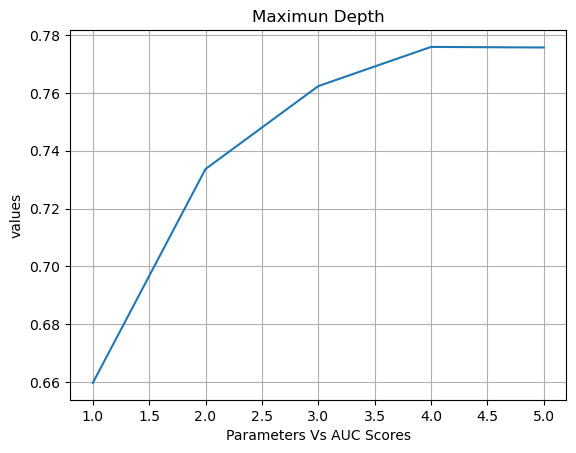

In [505]:


plt.plot(critery_estimator_2, roc_auc) 
#add title
plt.title('Maximun Depth')
#add y label
plt.ylabel('values')
#add x label 
plt.xlabel("Parameters Vs AUC Scores")
#show grid
plt.grid(True)
#show 
plt.show()

In [506]:
param_grid_forest_2 = {'max_depth' : critery_estimator_2}
grid_search_2 = GridSearchCV(Dtree_clf, param_grid_forest_2, cv = 4, scoring='roc_auc', refit = True)
grid_search_2.fit(X_train_encoded, y_train_encoded)

best_params_2 = grid_search_2.best_params_
best_estimators_2 = grid_search_2.best_estimator_

print(best_params_2)
print(best_estimators_2)

{'max_depth': 5}
DecisionTreeClassifier(max_depth=5, random_state=42)


In [507]:
#Print the accuracy score
print(best_estimators_2.score(X_train_encoded, y_train_encoded))

0.9100833333333334


In [508]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_2 = best_estimators_2.predict(X_test_encoded)
print(accuracy_score(y_test_encoded, y_test_estimations_2))

0.9126666666666666


In [509]:
#Criterion = Min Samples Split.
criterion_estimators_3 = list(range(2,10))

roc_auc_values = []

for item in criterion_estimators_3:
    Dtree_clf = DecisionTreeClassifier(min_samples_split=item, random_state=42)
    Dtree_clf.fit(X_train_encoded,y_train_encoded)

    y_probas_trees = cross_val_predict(Dtree_clf,X_train_encoded,y_train_encoded, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train_encoded,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

In [510]:
criterion_estimators_3 = [(i + 1) / 1000 for i in range(8)]
criterion_estimators_3
#reduce the range to adapt to my roc values

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]

In [511]:
roc_auc_values
#show the roc values

[0.784517762629482,
 0.7819404436555711,
 0.7831925215721134,
 0.7841197110907225,
 0.786328446186337,
 0.7861812269452764,
 0.7874872098447465,
 0.7874478601001687]

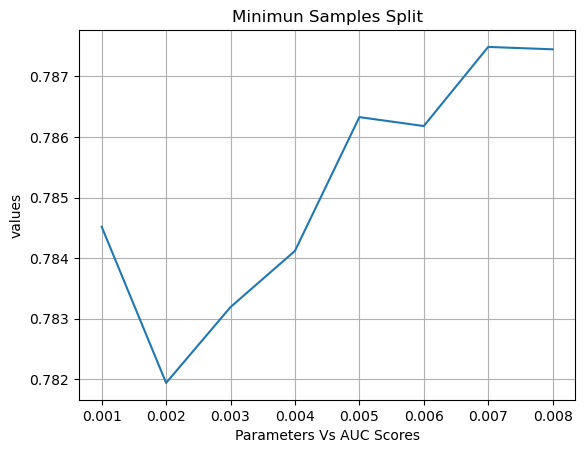

In [512]:
plt.plot(criterion_estimators_3, roc_auc_values) 
#add title
plt.title('Minimun Samples Split')
#add y label
plt.ylabel('values')
#add x label 
plt.xlabel("Parameters Vs AUC Scores")
#show grid
plt.grid(True)
#show 
plt.show()

In [513]:
#Set the min_samples_split to None as this parameter keeps increasing at a decreasing rate.But a higher score
# is generated with 20 as min sample split
param_grid_forest_3 = {'min_samples_split' : criterion_estimators_3}
grid_search_3 = GridSearchCV(Dtree_clf, param_grid_forest_3, cv = 4, scoring='roc_auc', refit = True)
grid_search_3.fit(X_train_encoded,y_train_encoded)

best_params_3 = grid_search_3.best_params_
best_estimators_3 = grid_search_3.best_estimator_

print(best_params_3)
print(best_estimators_3)

{'min_samples_split': 0.007}
DecisionTreeClassifier(min_samples_split=0.007, random_state=42)


In [514]:
#Print the accuracy score compare with 0.73 there is a overfiting due to the ompurity and randomess 
print(best_estimators_3.score(X_train_encoded,y_train_encoded))

0.9580833333333333


In [515]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_3 = best_estimators_3.predict(X_test_encoded)
print(accuracy_score(y_test_encoded, y_test_estimations_3))

0.9136666666666666


In [516]:
#Criteria : min_samples_leaf
criterion_estimators_4 = [(i + 1) / 10 for i in range(5)]

roc_auc_values = []

for item in criterion_estimators_4:
    Dtree_clf = DecisionTreeClassifier(min_samples_leaf=item, random_state=42)
    Dtree_clf.fit(X_train_encoded,y_train_encoded)

    y_probas_trees = cross_val_predict(Dtree_clf,X_train_encoded,y_train_encoded, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train_encoded,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

In [517]:
criterion_estimators_4 = [(i + 1) / 1000 for i in range(5)]
criterion_estimators_4

[0.001, 0.002, 0.003, 0.004, 0.005]

In [518]:
roc_auc_values

[0.6548546988357477,
 0.5832243823637897,
 0.5839778615122351,
 0.5514209782120285,
 0.5121511535011509]

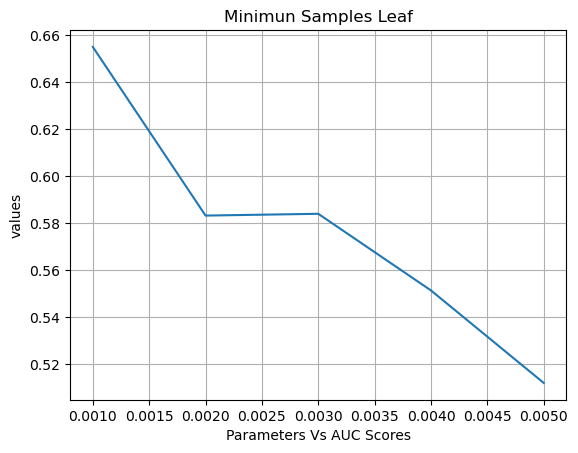

In [519]:
plt.plot(criterion_estimators_4, roc_auc_values) 
#add title
plt.title('Minimun Samples Leaf')
#add y label
plt.ylabel('values')
#add x label 
plt.xlabel("Parameters Vs AUC Scores")
#show grid
plt.grid(True)
#show 
plt.show()

In [520]:
param_grid_forest_4 = {'min_samples_leaf' : criterion_estimators_4}
grid_search_4 = GridSearchCV(Dtree_clf, param_grid_forest_4, cv = 4, scoring='roc_auc', refit = True)
grid_search_4.fit(X_train_encoded, y_train_encoded)

best_params_4 = grid_search_4.best_params_
best_estimators_4 = grid_search_4.best_estimator_

print(best_params_4)
print(best_estimators_4)

{'min_samples_leaf': 0.005}
DecisionTreeClassifier(min_samples_leaf=0.005, random_state=42)


In [521]:
#Print the accuracy score
print(best_estimators_4.score(X_train_encoded, y_train_encoded))

0.9056666666666666


In [522]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score

y_test_estimations_4 = best_estimators_4.predict(X_test_encoded)
print(accuracy_score(y_test_encoded, y_test_estimations_4))

0.904


In [523]:
#Criterion = max_leaf_nodes
criterion_estimators_5 = list(range(2, 35))

roc_auc_values = []

for item in criterion_estimators_5:
    Dtree_clf = DecisionTreeClassifier(max_leaf_nodes=item, random_state=42)
    Dtree_clf.fit(X_train_encoded, y_train_encoded)

    y_probas_trees = cross_val_predict(Dtree_clf,X_train_encoded, y_train_encoded, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train_encoded,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

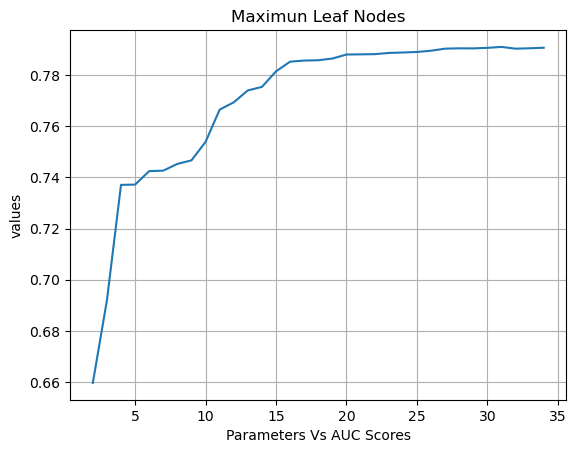

In [524]:
plt.plot(criterion_estimators_5, roc_auc_values) 
#add title
plt.title('Maximun Leaf Nodes')
#add y label
plt.ylabel('values')
#add x label 
plt.xlabel("Parameters Vs AUC Scores")
#show grid
plt.grid(True)
#show 
plt.show()

In [525]:
param_grid_forest_5 = {'max_leaf_nodes' : criterion_estimators_5}
grid_search_5 = GridSearchCV(Dtree_clf, param_grid_forest_5, cv = 4, scoring='roc_auc', refit = True)
grid_search_5.fit(X_train_encoded, y_train_encoded)

best_params_5 = grid_search_5.best_params_
best_estimators_5 = grid_search_5.best_estimator_

print(best_params_5)
print(best_estimators_5)

{'max_leaf_nodes': 31}
DecisionTreeClassifier(max_leaf_nodes=31, random_state=42)


In [526]:
#Print the accuracy score
print(best_estimators_5.score(X_train_encoded, y_train_encoded))

0.9129166666666667


In [527]:
#Check the Accuracy on Test data 
from sklearn.metrics import accuracy_score
y_test_estimations_5 = best_estimators_5.predict(X_test_encoded)
print(accuracy_score(y_test_encoded, y_test_estimations_5))

0.9133333333333333


In [528]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [529]:
#tuning all the parameters together 
parameter_distribution = {'criterion' : critery_estimator_1, 'max_depth' : critery_estimator_2,
                          'min_samples_split' : criterion_estimators_3, 'min_samples_leaf' : criterion_estimators_4,
                          'max_leaf_nodes' : criterion_estimators_5}

rnd_search_cv = RandomizedSearchCV(Dtree_clf, parameter_distribution, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_encoded, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=0.005, min_samples_split=0.008; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=0.005, min_samples_split=0.008; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=0.005, min_samples_split=0.008; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=0.005, min_samples_split=0.008; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_leaf_nodes=12, min_samples_leaf=0.005, min_samples_split=0.008; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=0.003, min_samples_split=0.001; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14, min_samples_leaf=0.003, min_samples_split=0.001; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_leaf_nodes=14

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_leaf_nodes=34,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_leaf': [0.001, 0.002,
                                                             0.003, 0.004,
                                                             0.005],
                                        'min_samples_split': [0.001, 0.002,
                                                              0.003, 0.004,
                                                              0.005, 0.006,
                                                              0.007, 0.008]},
                   verbose=2)

In [530]:
#Get the best estimator on Randomized SearchCV
rnd_search_cv.best_estimator_
rnd_search_cv.score(X_train_encoded, y_train_encoded)
#good results because are similar but 
#low bias and high variance 

0.882

In [531]:
# Based on the accuracy scores, we select the best estimator and work with the test set
from sklearn.metrics import accuracy_score

final_model = rnd_search_cv.best_estimator_ #best estimator with accuracy over 99%

y_test_estimations = final_model.predict(X_test_encoded)

print(accuracy_score(y_test_encoded, y_test_estimations))

0.9153333333333333


#### 2. Identify at least 4 models to apply 


we will apply the following models 
1. LogisticRegression
2. RandomForestClassifier
3. AdaBoostClassifier
4. GradientBoostingClassifier
5. ExtraTreesClassifier

with each model prediction we will work the following points 
* Show feature importance for each model 
* Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score


In [532]:
#import classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedShuffleSplit


#import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



#import  confusion matrix 
from sklearn.metrics import confusion_matrix




In [533]:
#define a function to show all the metrics 

def get_metrics(actual, prediction):
    
    # Measure Accurracy
    accuracy = accuracy_score(actual, prediction)

    # Measure precision
    precision = precision_score(actual, prediction)


    # Measure recall
    recall = recall_score(actual, prediction)

    # Measure AUC
    auc = roc_auc_score(actual, prediction)

    # Measure F1 score
    f1 = f1_score(actual, prediction)

    print('Accuracy: %.2f' % (accuracy*100))
    print('Precision: %.2f' % (precision*100))
    print('Recall: %.2f' % (recall*100))
    print('AUC: %.2f' % (auc*100))
    print('F1: %.2f' % (f1*100))
    
    return 

def create_kaggle_csv(predictions, IDS):
    #create csv for  kaggle

    #decoded results 
    target_decoded= le.inverse_transform(predictions)
    #convert prediction to data frame 
    # predictions_df  = pd.DataFrame(target_decoded)
    results = pd.DataFrame({'ObjectId':IDS,'ACCLASS': target_decoded })
    # Export results for submission DataFrame to a CSV file
    results.to_csv('submission.csv', index=False)
    
    return 

In [534]:
#remember the train and test we will be using 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"kaggle_test.shape: {kaggle_test.shape}")

print(f"X_train_encoded.shape: {X_train_encoded.shape}")
print(f"X_test_encoded.shape: {X_test_encoded.shape}")
print(f"kaggle_test_encoded.shape: {kaggle_test_encoded.shape}")



print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

print(f"y_train_encoded.shape: {y_train_encoded.shape}")
print(f"y_test_encoded.shape: {y_test_encoded.shape}")

X_train.shape: (12000, 47)
X_test.shape: (3000, 47)
kaggle_test.shape: (3194, 47)
X_train_encoded.shape: (12000, 4611)
X_test_encoded.shape: (3000, 4611)
kaggle_test_encoded.shape: (3194, 4611)
y_train.shape: (12000,)
y_test.shape: (3000,)
y_train_encoded.shape: (12000,)
y_test_encoded.shape: (3000,)


##### Feature selection

In [535]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

#train feature selection model, K = number of feature to be selected 
fs = SelectKBest(score_func=f_classif, k=10)
#fit selector with X, y train
fs.fit(X_train_encoded, y_train_encoded)
#get features
X_train_fs = fs.transform(X_train_encoded)
X_test_fs = fs.transform(X_test_encoded)

#show results

print('X_train_fs',X_train_fs.shape)
print('X_test_fs',X_test_fs.shape)
print('Score',len(fs.scores_))



X_train_fs (12000, 10)
X_test_fs (3000, 10)
Score 4611


/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/raemilcorniel/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


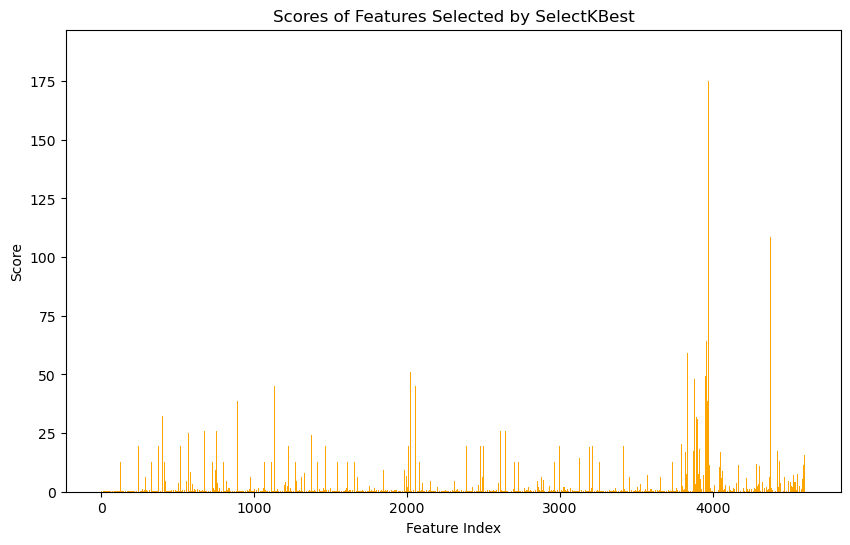

In [536]:

# Assuming fs.scores_ contains the scores of features
scores = fs.scores_

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, color='orange')
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.title('Scores of Features Selected by SelectKBest')
plt.show()

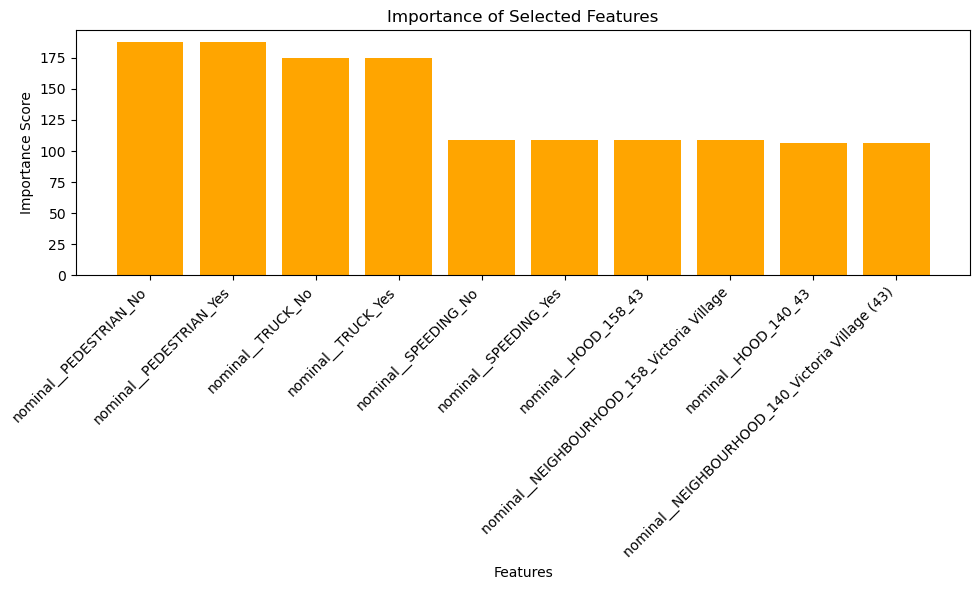

In [537]:

#show feature selected and inportance of each feature 

# Retrieve feature names
feature_names = pipeline_full.get_feature_names_out(input_features=X_train.columns)

# Convert to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)

# Get the indices of selected features
selected_feature_indices = fs.get_support(indices=True)


# Initialize lists to store feature names and scores
selected_feature_names = []
selected_feature_scores = []

# Map the indices to the original feature names and store them
for i in selected_feature_indices:
    selected_feature_names.append(X_train_encoded_df.iloc[:, i].name)
    selected_feature_scores.append(scores[i])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, sorted(selected_feature_scores, reverse= True), color='orange')
plt.title('Importance of Selected Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


##### 1. LogisticRegression

In [538]:

# fit the model
logistic_reg = LogisticRegression(solver='lbfgs')

#send X_Train_fs that already has the best feature selected and our target
logistic_reg.fit(X_train_fs, y_train_encoded)

# evaluate the model
predictions_log_reg = logistic_reg.predict(X_test_fs)




In [539]:
# evaluate the model with train data 
predictions_log_reg_train = logistic_reg.predict(X_train_fs)

get_metrics(y_train_encoded,predictions_log_reg_train)


Accuracy: 86.78
Precision: 86.85
Recall: 99.84
AUC: 51.43
F1: 92.89


Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score

In [540]:
#evaluate predictons 
get_metrics(y_test_encoded,predictions_log_reg)

Accuracy: 86.77
Precision: 86.81
Recall: 99.88
AUC: 51.18
F1: 92.89


In [541]:
#confusion_matrix
confusion_matrix(y_test_encoded, predictions_log_reg)

array([[  10,  394],
       [   3, 2593]])

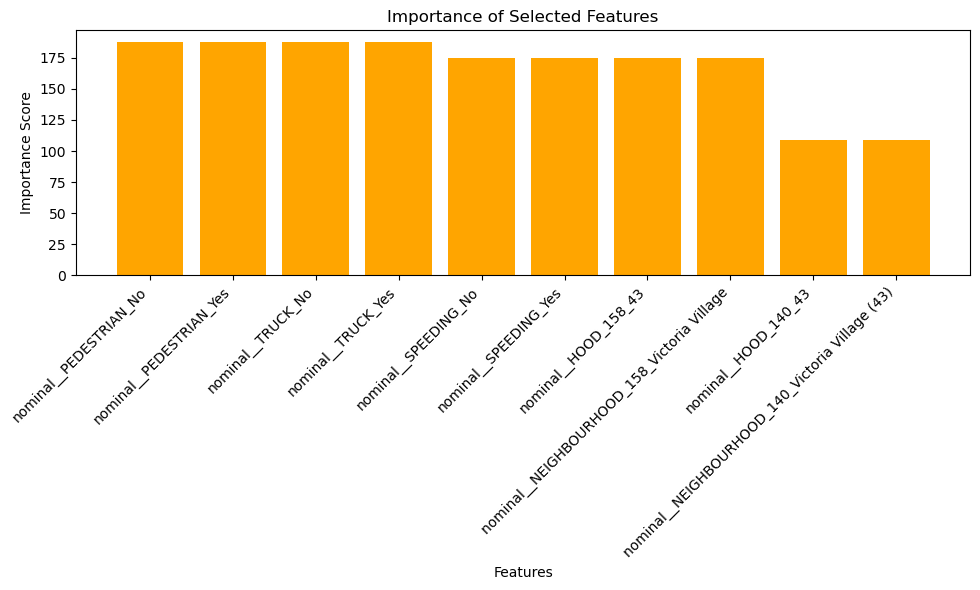

In [542]:
# Map the indices to the original feature names and store them
for i in selected_feature_indices:
    selected_feature_names.append(X_train_encoded_df.iloc[:, i].name)
    selected_feature_scores.append(scores[i])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, sorted(selected_feature_scores, reverse= True), color='orange')
plt.title('Importance of Selected Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [543]:
#for Kaggle 



#adapt feature selection to kaggle test 
kaggle_test_encoded_fs = fs.transform(kaggle_test_encoded)


#kaggle predict 
predictions_log_reg = logistic_reg.predict(kaggle_test_encoded_fs)


#create csv for  kaggle
create_kaggle_csv(predictions_log_reg,kaggle_test_IDS)


#Kaggle results 
# #Feautes     Kaggle Results    Accurracy
#   10         0.8219              86.77
#   100        0.8173              87.70
#   200        0.8116              88.00
#   all        0.8002              89.30

Even though this is one of the simple models and the most use when starting to work in the model, it show good results compare our pediction and actual results on kaggle. but in other words we could say that the relation between accuracy and presicion and recall are high therefore we can say the model is clasifying correctly the fatal and non fatal, but our AUC is low which means the ability of knowing which class is which.

##### 2. RandomForestClassifier

In [544]:
#Designing the random forest classifier

# Random Forest Classifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the search space for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': uniform(0.1, 0.4),  # Adjusted the range based on the original values
    'max_depth': randint(2, 20),
    'min_samples_split': uniform(0.1, 0.4),  # Adjusted the range based on the original values
    'min_samples_leaf': uniform(0.1, 0.4),  # Adjusted the range based on the original values
    'max_leaf_nodes': randint(2, 100),
    'oob_score': [True, False]
}

# Initialize Random Forest classifier
Random_Forest_Classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_RndmForest = RandomizedSearchCV(
    Random_Forest_Classifier, param_distributions=param_dist, cv=4, scoring='roc_auc', refit=True, n_jobs=-1, verbose=2
)

# Fit the RandomizedSearchCV
random_search_RndmForest.fit(X_train_encoded, y_train_encoded)

# Get the best parameters and best estimator
forest_best_params_ = random_search_RndmForest.best_params_
forest_best_estimator_ = random_search_RndmForest.best_estimator_

print(forest_best_params_)
print(f"Best stimator:", forest_best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
{'max_depth': 3, 'max_features': 0.15523501354429095, 'max_leaf_nodes': 94, 'min_samples_leaf': 0.199465985293734, 'min_samples_split': 0.3631223488543939, 'n_estimators': 17, 'oob_score': False}
Best stimator: RandomForestClassifier(max_depth=3, max_features=0.15523501354429095,
                       max_leaf_nodes=94, min_samples_leaf=0.199465985293734,
                       min_samples_split=0.3631223488543939, n_estimators=17,
                       random_state=42)


In [581]:
# Make predictions on the test set
y_pred = forest_best_estimator_.predict(X_test_encoded)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, zero_division=1))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

Accuracy: 0.8653333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       404
           1       0.87      1.00      0.93      2596

    accuracy                           0.87      3000
   macro avg       0.93      0.50      0.46      3000
weighted avg       0.88      0.87      0.80      3000

Confusion Matrix:
[[   0  404]
 [   0 2596]]


In [583]:
 
# evaluate the model with train data 
X_train_pred = forest_best_estimator_.predict(X_train_encoded)

#actual vs pred
get_metrics(y_train_encoded,X_train_pred)

Accuracy: 86.52
Precision: 86.52
Recall: 100.00
AUC: 50.00
F1: 92.77


In [547]:
get_metrics(y_test_encoded,y_pred)
#return metrics in percentage 

Accuracy: 86.53
Precision: 86.53
Recall: 100.00
AUC: 50.00
F1: 92.78


In [548]:

# Now we capture the feature importanc

Random_Forest_estimators = forest_best_estimator_

for name, score in sorted(zip(X_train.columns, Random_Forest_estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

YEAR 0.0
TIME 0.0
STREET1 0.0
STREET2 0.0
ROAD_CLASS 0.0
DISTRICT 0.0
WARDNUM 0.0
LATITUDE 0.0
LONGITUDE 0.0
LOCCOORD 0.0
ACCLOC 0.0
TRAFFCTL 0.0
VISIBILITY 0.0
LIGHT 0.0
RDSFCOND 0.0
IMPACTYPE 0.0
INVTYPE 0.0
INVAGE 0.0
INJURY 0.0
INITDIR 0.0
VEHTYPE 0.0
MANOEUVER 0.0
DRIVACT 0.0
DRIVCOND 0.0
PEDESTRIAN 0.0
CYCLIST 0.0
AUTOMOBILE 0.0
MOTORCYCLE 0.0
TRUCK 0.0
TRSN_CITY_VEH 0.0
EMERG_VEH 0.0
PASSENGER 0.0
SPEEDING 0.0
AG_DRIV 0.0
REDLIGHT 0.0
ALCOHOL 0.0
DISABILITY 0.0
HOOD_158 0.0
NEIGHBOURHOOD_158 0.0
HOOD_140 0.0
NEIGHBOURHOOD_140 0.0
DIVISION 0.0
MONTH 0.0
DAY 0.0
HOUR 0.0
MINUTE 0.0
SECOND 0.0


#### Results 

* Accuracy: 86.53
* Precision: 86.53
* Recall: 100.00
* AUC: 50.00
* F1: 92.78


Kaggle Results
0.7442

The result suggests that the clasifier is effective making predictions, also with a 86.53 % precision the classifier has a relatively low rate of false positives, whit a low rate or false negative based on the Recall result. However the AUC suggest that the model is not effectively separating the classes.


##### 3. AdaBoostClassifier

In [549]:

# fit the model
# algorithm SAMME.R
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
#SAMME.R
#send X_Train_fs that already has the best feature selected and our target
ada_boost.fit(X_train_fs, y_train_encoded)

# evaluate the model
predictions_ada_boost = ada_boost.predict(X_test_fs)



Show metrics for each model Precision, Recall, Accuracy, AUC, F1 Score

In [584]:
# evaluate the model with train data 
X_train_pred = ada_boost.predict(X_train_fs)

#actual vs pred
get_metrics(y_train_encoded,X_train_pred)

Accuracy: 86.78
Precision: 86.85
Recall: 99.84
AUC: 51.43
F1: 92.89


In [550]:
 
get_metrics(y_test_encoded,predictions_ada_boost)

Accuracy: 86.77
Precision: 86.81
Recall: 99.88
AUC: 51.18
F1: 92.89


In [551]:
#confusion_matrix
confusion_matrix(y_test_encoded, predictions_ada_boost)

array([[  10,  394],
       [   3, 2593]])

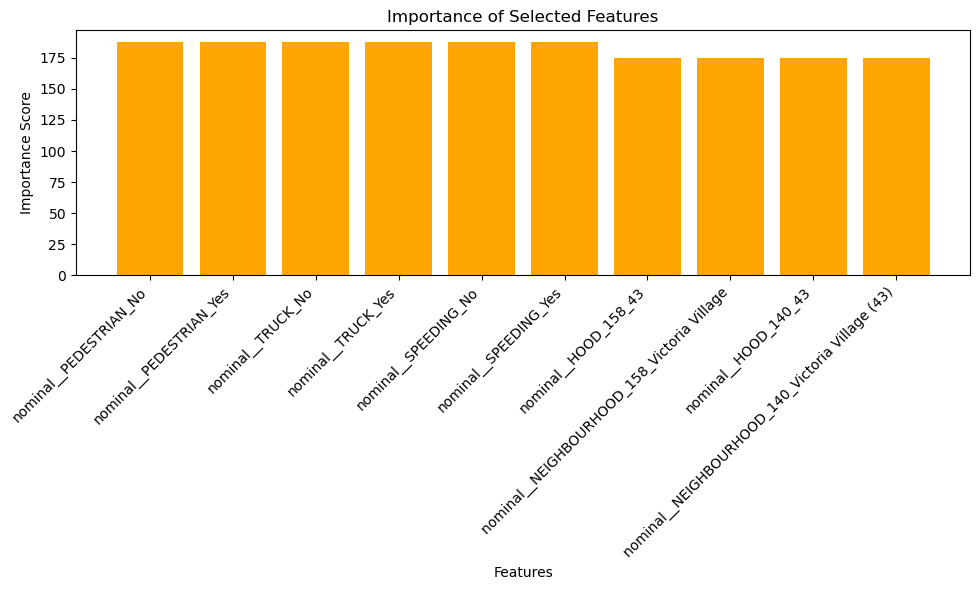

In [552]:
# Map the indices to the original feature names and store them
for i in selected_feature_indices:
    selected_feature_names.append(X_train_encoded_df.iloc[:, i].name)
    selected_feature_scores.append(scores[i])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, sorted(selected_feature_scores, reverse= True), color='orange')
plt.title('Importance of Selected Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#since the same feature where use for logistic and adaboost, thoose are the ones shown


In [553]:
#for Kaggle 

#adapt feature selection to kaggle test 
kaggle_test_encoded_fs = fs.transform(kaggle_test_encoded)


#kaggle predict 
predictions_ada_boost = ada_boost.predict(kaggle_test_encoded_fs)


#create csv for  kaggle
create_kaggle_csv(predictions_ada_boost,kaggle_test_IDS)


#Kaggle results 
# #Feautes     Results    Accurracy
# 10.           0.8219     86.80


With an accurracy of 86.80 this model looks to be a good solution, even though at this point we haven try more models, if we compare this model with logistic regession similar results will be encounter and this is do to the lack of hyperparameters we used, but again as we try more models our hyperparameters will be changing. so far we can say it preforms good, but still we will need to explore more the model to detect if is underfitting or overfitting




##### 4. GradientBoostingClassifier

In [554]:
 # Gradient Boosting Classifier

GB_Classifier = GradientBoostingClassifier(random_state = 42)

n_estimators = [3, 7]
learning_rate = [0.1, 0.01, .001]
max_depth = [3, 15, 20]
min_samples_split = [0.2, 0.3]
min_samples_leaf = [3, 4]
max_features = [4, 6]
max_leaf_nodes = [2, 3]
                            
parameter_GB_Classifier = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate,
                              'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                              'min_samples_leaf' : min_samples_leaf, 'max_features' : max_features,
                              'max_leaf_nodes' : max_leaf_nodes}

grid_search_GB_Classifier = GridSearchCV(GB_Classifier, parameter_GB_Classifier, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)

grid_search_GB_Classifier.fit(X_train_encoded, y_train_encoded)

GB_Classifier_best_params_ = grid_search_GB_Classifier.best_params_

GB_Classifier_best_estimators_ = grid_search_GB_Classifier.best_estimator_

print(GB_Classifier_best_params_)

print(GB_Classifier_best_estimators_)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 6, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 0.2, 'n_estimators': 7}
GradientBoostingClassifier(max_features=6, max_leaf_nodes=3, min_samples_leaf=3,
                           min_samples_split=0.2, n_estimators=7,
                           random_state=42)


In [555]:
# Make predictions on the test set
y_pred2 = GB_Classifier_best_estimators_.predict(X_test_encoded)


y_test_binary = [1 if label == 'Fatal' else 0 for label in y_test]
y_pred_binary = [1 if label == 'Fatal' else 0 for label in y_pred2]

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred2)
print("Accuracy:", accuracy)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
print("ROC-AUC Score:", roc_auc)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred2, zero_division=1))


#Create the confusion Matrix on the stack set for GB Classifier
GB_estimators = GB_Classifier_best_estimators_
y_estimator_GB = GB_estimators.predict(X_train_encoded)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_encoded, y_estimator_GB)

Accuracy: 0.8653333333333333
ROC-AUC Score: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       404
           1       0.87      1.00      0.93      2596

    accuracy                           0.87      3000
   macro avg       0.93      0.50      0.46      3000
weighted avg       0.88      0.87      0.80      3000



array([[    0,  1618],
       [    0, 10382]])

In [586]:
# evaluate the model with train data 
X_train_pred = GB_Classifier_best_estimators_.predict(X_train_encoded)

#actual vs pred
get_metrics(y_train_encoded,X_train_pred)

Accuracy: 86.52
Precision: 86.52
Recall: 100.00
AUC: 50.00
F1: 92.77


In [587]:

#actual vs pred test set 
get_metrics(y_train_encoded,y_estimator_GB)

Accuracy: 86.52
Precision: 86.52
Recall: 100.00
AUC: 50.00
F1: 92.77


In [556]:
# Now we capture the feature importance

for name, score in sorted(zip(X_train.columns, GB_estimators.feature_importances_), key=lambda x: x[1],reverse=True):
    print(name, score)

YEAR 0.0
TIME 0.0
STREET1 0.0
STREET2 0.0
ROAD_CLASS 0.0
DISTRICT 0.0
WARDNUM 0.0
LATITUDE 0.0
LONGITUDE 0.0
LOCCOORD 0.0
ACCLOC 0.0
TRAFFCTL 0.0
VISIBILITY 0.0
LIGHT 0.0
RDSFCOND 0.0
IMPACTYPE 0.0
INVTYPE 0.0
INVAGE 0.0
INJURY 0.0
INITDIR 0.0
VEHTYPE 0.0
MANOEUVER 0.0
DRIVACT 0.0
DRIVCOND 0.0
PEDESTRIAN 0.0
CYCLIST 0.0
AUTOMOBILE 0.0
MOTORCYCLE 0.0
TRUCK 0.0
TRSN_CITY_VEH 0.0
EMERG_VEH 0.0
PASSENGER 0.0
SPEEDING 0.0
AG_DRIV 0.0
REDLIGHT 0.0
ALCOHOL 0.0
DISABILITY 0.0
HOOD_158 0.0
NEIGHBOURHOOD_158 0.0
HOOD_140 0.0
NEIGHBOURHOOD_140 0.0
DIVISION 0.0
MONTH 0.0
DAY 0.0
HOUR 0.0
MINUTE 0.0
SECOND 0.0


#### Results 

* Accuracy: 86.53
* Precision: 86.53
* Recall: 100.00
* AUC: 50.00
* F1: 92.78


Kaggle Results
0,8264

With the results and metrics for the  gradient boosting classifier we got a high accuracy, precision, recall, and F1 scores. However, the AUC score indicates that the model needs to be improving because right now is random guessing. Otherwise,  Implementing best feature selection for the model and avoiding the overfitting may improve the model results for classification.


##### 5. ExtraTreesClassifier

In [571]:
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the Extra Trees classifier
ET_Classifier = ExtraTreesClassifier(random_state=42)

# Define the search space for hyperparameters
param_space = {
    'n_estimators': (10, 100),
    'max_features': (0.1, 0.5),
    'max_depth': (2, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Initialize BayesSearchCV with Extra Trees classifier
bayes_search_ET = BayesSearchCV(
    ET_Classifier, param_space, cv=StratifiedKFold(n_splits=4), scoring='roc_auc',
    n_jobs=-1, n_iter=20, random_state=42, verbose=1
)

# Perform Bayesian optimization
bayes_search_ET.fit(X_train_encoded, y_train_encoded)

# Get the best parameters and best estimator
best_params_ET = bayes_search_ET.best_params_
best_estimator_ET = bayes_search_ET.best_estimator_

print("Best Parameters:")
print(best_params_ET)

print("Best Estimator:")
print(best_estimator_ET)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

In [574]:
# Make predictions on the test set
y_pred3 = best_estimator_ET.predict(X_test_encoded)

# y_test_binary3 = [1 if label == 'Fatal' else 0 for label in y_test]
# y_pred_binary3 = [1 if label == 'Fatal' else 0 for label in y_pred3]

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred3)
print("Accuracy:", accuracy)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred3)
print("ROC-AUC Score:", roc_auc)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred3, zero_division=1))

Accuracy: 0.875
ROC-AUC Score: 0.5358910891089108
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       404
           1       0.87      1.00      0.93      2596

    accuracy                           0.88      3000
   macro avg       0.94      0.54      0.53      3000
weighted avg       0.89      0.88      0.83      3000



In [591]:
y_final_estimator_ET = best_estimator_ET.predict(X_test_encoded)
confusion_matrix(y_test_encoded, y_final_estimator_ET)

array([[  29,  375],
       [   0, 2596]])

In [592]:
# evaluate the model with train data 
X_train_pred = best_estimator_ET.predict(X_train_encoded)

#actual vs pred
get_metrics(y_train_encoded,X_train_pred)

Accuracy: 88.39
Precision: 88.17
Recall: 100.00
AUC: 56.95
F1: 93.71


In [593]:
get_metrics(y_test_encoded,y_pred3)

Accuracy: 87.50
Precision: 87.38
Recall: 100.00
AUC: 53.59
F1: 93.26


#### Results 

* Accuracy: 87.50
* Precision: 87.38
* Recall: 100.00
* AUC: 53.59

Kaggle Results
0,8264

With the results and metrics for the ExtraTrees, we got one of the highest AUCs so far, which means that the model is classifying better than the others previously used. as for the accuracy and precision this are just like the other which are good but can be improved